In [1]:
# cnn model
import keras
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.utils import to_categorical
try: from sklearn.model_selection import train_test_split
except: from sklearn.cross_validation import train_test_split
import pandas as pd
import numpy as np
from sklearn import datasets
import sys
sys.path.insert(0,'..')

Using TensorFlow backend.


### Read the train & test and preprocessing

In [2]:
# load data
import pandas as pd
df=pd.read_csv('csv_result-PhishingData.csv') 
del df['id']
df.head()

,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address,Result
0,1,-1,1,-1,-1,1,1,1,0,0
1,-1,-1,-1,-1,-1,0,1,1,1,1
2,1,-1,0,0,-1,0,-1,1,0,1
3,1,0,1,-1,-1,0,1,1,0,0
4,-1,-1,1,-1,0,0,-1,1,0,1


In [3]:
# df to values
df = df.values
Y = df[:,9]
X = df[:,0:9]

In [4]:
#Load the data, split into training/testing groups
x_train, x_test, y_train, y_test = train_test_split(np.asarray(X), np.asarray(Y), test_size=0.3, shuffle= True)
x_train_, x_test_, y_train_, y_test_ = x_train, x_test, y_train, y_test
# The known number of output classes.
num_classes = len(np.unique(y_train))
# Input image dimensions
input_shape = (X.shape[1],)

# Convert class vectors to binary class matrices. This uses 1 hot encoding.
y_train_binary = keras.utils.to_categorical(y_train, num_classes)
y_test_binary = keras.utils.to_categorical(y_test, num_classes)

x_train = x_train.reshape(x_train.shape[0], X.shape[1],1)
x_test = x_test.reshape(x_test.shape[0], X.shape[1],1)

### Creation structure of CNN

In [5]:
# build CNN
def CNN_net():
    model = Sequential()
    
    model.add(Conv1D(filters=128, kernel_size=3, activation='relu', input_shape=(X.shape[1],1)))
    #model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.5))
    
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=4))
    model.add(Dropout(0.5))

    
    model.add(Flatten())
    model.add(Dense(X.shape[1]))
    model.add(Activation('relu'))
    #model.add(Dense(X.shape[1]))
    #model.add(Activation('relu'))
    
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))
    
    model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
    return model

In [6]:
# Parametres
verbose, epochs, batch_size = 1, 200, 3
# initialize the model object
clf_cnn = CNN_net()
# fit network
history = clf_cnn.fit(x_train, y_train_binary, batch_size=batch_size,
          epochs=epochs, verbose=verbose, validation_data=(x_test, y_test_binary))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Train on 947 samples, validate on 406 samples
Epoch 1/200
947/947 [==============================] - 1s 1ms/step - loss: 0.7407 - accuracy: 0.7001 - val_loss: 0.5507 - val_accuracy: 0.7833
Epoch 2/200
947/947 [==============================] - 1s 765us/step - loss: 0.6346 - accuracy: 0.7698 - val_loss: 0.4738 - val_accuracy: 0.8128
Epoch 3/200
947/947 [==============================] - 1s 781us/step - loss: 0.5759 - accuracy: 0.7930 - val_loss: 0.4666 - val_accuracy: 0.8079
Epoch 4/200
947/947 [==============================] - 1s 769us/step - loss: 0.5487 - accuracy: 0.7983 - val_loss: 0.4388 - val_accuracy: 0.8251
Epoch 5/200
947/947 [==============================] - 1s 770us/step - loss: 0.5215 - accuracy: 0.8078 - val_loss: 0.4246 - val_accuracy: 0.8399
Epoch 6/200
947/947 [==============================] - 1s 802us/step - loss: 0.5198 - accuracy: 0.8068 - val_loss: 0.4504 - val_accuracy: 0.8177
Epo

947/947 [==============================] - 1s 759us/step - loss: 0.3467 - accuracy: 0.8627 - val_loss: 0.3037 - val_accuracy: 0.8793
Epoch 52/200
947/947 [==============================] - 1s 785us/step - loss: 0.3406 - accuracy: 0.8596 - val_loss: 0.3014 - val_accuracy: 0.8719
Epoch 53/200
947/947 [==============================] - 1s 832us/step - loss: 0.3537 - accuracy: 0.8511 - val_loss: 0.3108 - val_accuracy: 0.8621
Epoch 54/200
947/947 [==============================] - 1s 759us/step - loss: 0.3427 - accuracy: 0.8564 - val_loss: 0.3134 - val_accuracy: 0.8695
Epoch 55/200
947/947 [==============================] - 1s 792us/step - loss: 0.3516 - accuracy: 0.8596 - val_loss: 0.3038 - val_accuracy: 0.8719
Epoch 56/200
947/947 [==============================] - 1s 775us/step - loss: 0.3321 - accuracy: 0.8712 - val_loss: 0.3114 - val_accuracy: 0.8670
Epoch 57/200
947/947 [==============================] - 1s 866us/step - loss: 0.3384 - accuracy: 0.8627 - val_loss: 0.3038 - val_accuracy

947/947 [==============================] - 1s 1ms/step - loss: 0.3205 - accuracy: 0.8754 - val_loss: 0.2888 - val_accuracy: 0.8818
Epoch 108/200
947/947 [==============================] - 1s 1ms/step - loss: 0.3112 - accuracy: 0.8638 - val_loss: 0.2825 - val_accuracy: 0.8842
Epoch 109/200
947/947 [==============================] - 1s 1ms/step - loss: 0.3111 - accuracy: 0.8765 - val_loss: 0.2875 - val_accuracy: 0.8768
Epoch 110/200
947/947 [==============================] - 1s 1ms/step - loss: 0.2948 - accuracy: 0.8691 - val_loss: 0.2751 - val_accuracy: 0.8768
Epoch 111/200
947/947 [==============================] - 1s 1ms/step - loss: 0.3005 - accuracy: 0.8860 - val_loss: 0.2840 - val_accuracy: 0.8768
Epoch 112/200
947/947 [==============================] - 1s 1ms/step - loss: 0.3003 - accuracy: 0.8722 - val_loss: 0.2756 - val_accuracy: 0.8793
Epoch 113/200
947/947 [==============================] - 1s 823us/step - loss: 0.3015 - accuracy: 0.8881 - val_loss: 0.2775 - val_accuracy: 0.87

947/947 [==============================] - 1s 874us/step - loss: 0.2805 - accuracy: 0.8870 - val_loss: 0.2686 - val_accuracy: 0.8916
Epoch 164/200
947/947 [==============================] - 1s 855us/step - loss: 0.2692 - accuracy: 0.8912 - val_loss: 0.2716 - val_accuracy: 0.8867
Epoch 165/200
947/947 [==============================] - 1s 1ms/step - loss: 0.2876 - accuracy: 0.8828 - val_loss: 0.2646 - val_accuracy: 0.8941
Epoch 166/200
947/947 [==============================] - 1s 1ms/step - loss: 0.2774 - accuracy: 0.8955 - val_loss: 0.2604 - val_accuracy: 0.8990
Epoch 167/200
947/947 [==============================] - 1s 1ms/step - loss: 0.2828 - accuracy: 0.8860 - val_loss: 0.2656 - val_accuracy: 0.8892
Epoch 168/200
947/947 [==============================] - 1s 1ms/step - loss: 0.2712 - accuracy: 0.8870 - val_loss: 0.2697 - val_accuracy: 0.8892
Epoch 169/200
947/947 [==============================] - 1s 1ms/step - loss: 0.2713 - accuracy: 0.8955 - val_loss: 0.2634 - val_accuracy: 0.

In [7]:
# call predict to get predictions Report the accuracy
clf_cnn.evaluate(x_test, y_test_binary)

406/406 [==============================] - 0s 77us/step


[0.2976840069434913, 0.8817734122276306]

In [8]:
# call predict to get predictions
y_pred = clf_cnn.predict(x_test)
y_pred = np.round(y_pred)
from sklearn.metrics import accuracy_score
# Report the accuracy
accuracy_CNN = accuracy_score(y_test_binary, y_pred)
print("CNN : Accuracy: " + str(accuracy_CNN))

CNN : Accuracy: 0.8817733990147784


In [9]:
clf_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 7, 128)            512       
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 128)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 5, 64)             24640     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 64)             0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 1, 64)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 9)                

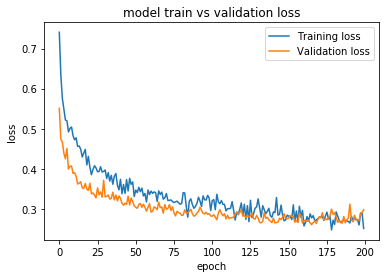

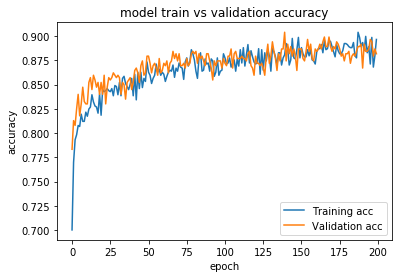

In [10]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training loss','Validation loss'], loc='best')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model train vs validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Training acc','Validation acc'], loc='best')
plt.show()

### Testing the Novel Approach

### Feature Extraction by CNN

In [11]:
from keras.models import Model
# from the first Fully-Connected layer 
layer_name = 'dense_1'
intermediate_layer_model = Model(inputs=clf_cnn.input,
                                 outputs=clf_cnn.get_layer(layer_name).output)

In [12]:
# Save the features of the train dataset to use it in future.
out_cnn_train = intermediate_layer_model.predict(x_train)
# Save the features of the test dataset to use it in future.
out_cnn_test = intermediate_layer_model.predict(x_test)

In [13]:
print('Training Features (from CNN) Shape:', out_cnn_train.shape)
print('Training Labels (from CNN) Shape:', y_train.shape)

print('Test Features (from CNN) Shape:', out_cnn_test.shape)
print('Test Labels (from CNN) Shape:', y_test.shape)

Training Features (from CNN) Shape: (947, 9)
Training Labels (from CNN) Shape: (947,)
Test Features (from CNN) Shape: (406, 9)
Test Labels (from CNN) Shape: (406,)


### Classification by CNN + Random Forest + MLP

In [14]:
from djinn import djinn

print("djinn aloi")    
modelname="class_djinn_aloi"   # name the model
ntrees=100                 # number of trees = number of neural nets in ensemble
maxdepth=2             # max depth of tree -- optimize this for each data set
dropout_keep=1.0 

#initialize the model
model=djinn.DJINN_Classifier(ntrees,maxdepth,dropout_keep)

x_train, y_train, x_test, y_test = out_cnn_train, y_train, out_cnn_test, y_test 
# find optimal settings: this function returns dict with hyper-parameters
# each djinn function accepts random seeds for reproducible behavior
optimal=model.get_hyperparameters(x_train, y_train, random_state=1)
batchsize=optimal['batch_size']
learnrate=optimal['learn_rate']
epochs=optimal['epochs']

# batchsize=48
# learnrate=0.0002
# epochs=1000

# train the model with hyperparameters determined above
model.train(x_train,y_train,epochs=epochs,learn_rate=learnrate, batch_size=batchsize, 
              display_step=1, save_files=True, file_name=modelname, 
              save_model=True,model_name=modelname, random_state=1)

# *note there is a function model.fit(x_train,y_train, ... ) that wraps 
# get_hyperparameters() and train(), so that you do not have to manually
# pass hyperparameters to train(). However, get_hyperparameters() can
# be expensive, so I recommend running it once per dataset and using those
# hyperparameter values in train() to save computational time
# make predictions
m=model.predict(x_test) #returns the median prediction if more than one tree

import sklearn
#evaluate results
acc=sklearn.metrics.accuracy_score(y_test,m.flatten())  
#close model 
model.close_model()

djinn aloi
Finding optimal hyper-parameters...
Determining learning rate...


Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Determining number of epochs needed...



Optimal learning rate:  0.0034338826667187653
Optimal # epochs:  210
Optimal batch size:  48



Epoch: 0001 cost= 0.909691548 accuracy= 0.000
Epoch: 0002 cost= 0.537924910 accuracy= 0.407
Epoch: 0003 cost= 0.348695539 accuracy= 0.408
Epoch: 0004 cost= 0.321867478 accuracy= 0.408
Epoch: 0005 cost= 0.295712495 accuracy= 0.408

Epoch: 0135 cost= 0.265162673 accuracy= 0.407
Epoch: 0136 cost= 0.256948984 accuracy= 0.462
Epoch: 0137 cost= 0.272192683 accuracy= 0.407
Epoch: 0138 cost= 0.302817942 accuracy= 0.408
Epoch: 0139 cost= 0.262098626 accuracy= 0.563
Epoch: 0140 cost= 0.235120119 accuracy= 0.408
Epoch: 0141 cost= 0.262518545 accuracy= 0.696
Epoch: 0142 cost= 0.260718502 accuracy= 0.643
Epoch: 0143 cost= 0.287266169 accuracy= 0.408
Epoch: 0144 cost= 0.289412684 accuracy= 0.423
Epoch: 0145 cost= 0.281943834 accuracy= 0.453
Epoch: 0146 cost= 0.230345566 accuracy= 0.407
Epoch: 0147 cost= 0.291610662 accuracy= 0.529
Epoch: 0148 cost= 0.248588724 accuracy= 0.506
Epoch: 0149 cost= 0.254160746 accuracy= 0.407
Epoch: 0150 cost= 0.289725163 accuracy= 0.700
Epoch: 0151 cost= 0.258886907 accuracy= 0.817
Epoch: 0152 cost= 0.305252002 accuracy= 0.440
Epoch: 0153 cost= 0.274422433 accuracy= 0.415
Epoch: 0154 cost= 0.301180561 accuracy= 0.408
Epoch: 0155 cost= 0.292129685 accuracy= 0.408
Epoch: 0156 cost= 0.301468357 accu

Epoch: 0105 cost= 0.100451093 accuracy= 0.495
Epoch: 0106 cost= 0.098816284 accuracy= 0.502
Epoch: 0107 cost= 0.103414040 accuracy= 0.495
Epoch: 0108 cost= 0.081486245 accuracy= 0.472
Epoch: 0109 cost= 0.092113710 accuracy= 0.481
Epoch: 0110 cost= 0.085733911 accuracy= 0.501
Epoch: 0111 cost= 0.112263094 accuracy= 0.502
Epoch: 0112 cost= 0.103103740 accuracy= 0.513
Epoch: 0113 cost= 0.095041715 accuracy= 0.514
Epoch: 0114 cost= 0.097641503 accuracy= 0.508
Epoch: 0115 cost= 0.095210480 accuracy= 0.527
Epoch: 0116 cost= 0.080209218 accuracy= 0.550
Epoch: 0117 cost= 0.088224566 accuracy= 0.540
Epoch: 0118 cost= 0.092127356 accuracy= 0.536
Epoch: 0119 cost= 0.097806692 accuracy= 0.535
Epoch: 0120 cost= 0.106986012 accuracy= 0.514
Epoch: 0121 cost= 0.086677327 accuracy= 0.535
Epoch: 0122 cost= 0.094568770 accuracy= 0.550
Epoch: 0123 cost= 0.103396971 accuracy= 0.534
Epoch: 0124 cost= 0.095561383 accuracy= 0.506
Epoch: 0125 cost= 0.099747051 accuracy= 0.548
Epoch: 0126 cost= 0.096618261 accu

Epoch: 0074 cost= 0.128844562 accuracy= 0.408
Epoch: 0075 cost= 0.135125197 accuracy= 0.407
Epoch: 0076 cost= 0.137715374 accuracy= 0.407
Epoch: 0077 cost= 0.138773918 accuracy= 0.636
Epoch: 0078 cost= 0.134596480 accuracy= 0.471
Epoch: 0079 cost= 0.139711249 accuracy= 0.568
Epoch: 0080 cost= 0.112206622 accuracy= 0.465
Epoch: 0081 cost= 0.143381937 accuracy= 0.569
Epoch: 0082 cost= 0.144061395 accuracy= 0.507
Epoch: 0083 cost= 0.121462585 accuracy= 0.511
Epoch: 0084 cost= 0.143999348 accuracy= 0.467
Epoch: 0085 cost= 0.140920445 accuracy= 0.567
Epoch: 0086 cost= 0.139936701 accuracy= 0.534
Epoch: 0087 cost= 0.132816988 accuracy= 0.531
Epoch: 0088 cost= 0.132454829 accuracy= 0.453
Epoch: 0089 cost= 0.127738805 accuracy= 0.445
Epoch: 0090 cost= 0.132691763 accuracy= 0.478
Epoch: 0091 cost= 0.145264881 accuracy= 0.536
Epoch: 0092 cost= 0.138503864 accuracy= 0.467
Epoch: 0093 cost= 0.120151286 accuracy= 0.442
Epoch: 0094 cost= 0.126245534 accuracy= 0.480
Epoch: 0095 cost= 0.137737531 accu

Epoch: 0043 cost= 0.297070721 accuracy= 0.408
Epoch: 0044 cost= 0.299137195 accuracy= 0.408
Epoch: 0045 cost= 0.323364417 accuracy= 0.408
Epoch: 0046 cost= 0.282844865 accuracy= 0.408
Epoch: 0047 cost= 0.310787523 accuracy= 0.408
Epoch: 0048 cost= 0.309985000 accuracy= 0.408
Epoch: 0049 cost= 0.278202906 accuracy= 0.408
Epoch: 0050 cost= 0.308922495 accuracy= 0.408
Epoch: 0051 cost= 0.296965383 accuracy= 0.408
Epoch: 0052 cost= 0.300236506 accuracy= 0.408
Epoch: 0053 cost= 0.299028345 accuracy= 0.408
Epoch: 0054 cost= 0.280443930 accuracy= 0.408
Epoch: 0055 cost= 0.279517355 accuracy= 0.408
Epoch: 0056 cost= 0.302171683 accuracy= 0.408
Epoch: 0057 cost= 0.315409401 accuracy= 0.408
Epoch: 0058 cost= 0.291273047 accuracy= 0.408
Epoch: 0059 cost= 0.305691893 accuracy= 0.408
Epoch: 0060 cost= 0.283363763 accuracy= 0.408
Epoch: 0061 cost= 0.310620632 accuracy= 0.408
Epoch: 0062 cost= 0.303334498 accuracy= 0.408
Epoch: 0063 cost= 0.298004523 accuracy= 0.408
Epoch: 0064 cost= 0.302166898 accu

Epoch: 0011 cost= 0.296942017 accuracy= 0.408
Epoch: 0012 cost= 0.298788841 accuracy= 0.408
Epoch: 0013 cost= 0.294101795 accuracy= 0.408
Epoch: 0014 cost= 0.294179738 accuracy= 0.408
Epoch: 0015 cost= 0.341483688 accuracy= 0.408
Epoch: 0016 cost= 0.302095633 accuracy= 0.408
Epoch: 0017 cost= 0.343986891 accuracy= 0.408
Epoch: 0018 cost= 0.292307512 accuracy= 0.408
Epoch: 0019 cost= 0.294909326 accuracy= 0.408
Epoch: 0020 cost= 0.292581854 accuracy= 0.408
Epoch: 0021 cost= 0.337231174 accuracy= 0.408
Epoch: 0022 cost= 0.319936861 accuracy= 0.408
Epoch: 0023 cost= 0.312490050 accuracy= 0.408
Epoch: 0024 cost= 0.300231163 accuracy= 0.408
Epoch: 0025 cost= 0.299118459 accuracy= 0.408
Epoch: 0026 cost= 0.310769648 accuracy= 0.408
Epoch: 0027 cost= 0.313327858 accuracy= 0.408
Epoch: 0028 cost= 0.310553318 accuracy= 0.408
Epoch: 0029 cost= 0.288225774 accuracy= 0.408
Epoch: 0030 cost= 0.294390202 accuracy= 0.408
Epoch: 0031 cost= 0.312757441 accuracy= 0.408
Epoch: 0032 cost= 0.295266144 accu

Epoch: 0190 cost= 0.142684766 accuracy= 0.484
Epoch: 0191 cost= 0.153186749 accuracy= 0.511
Epoch: 0192 cost= 0.155967338 accuracy= 0.511
Epoch: 0193 cost= 0.155653115 accuracy= 0.488
Epoch: 0194 cost= 0.153534525 accuracy= 0.515
Epoch: 0195 cost= 0.149859394 accuracy= 0.492
Epoch: 0196 cost= 0.145988529 accuracy= 0.488
Epoch: 0197 cost= 0.139671939 accuracy= 0.522
Epoch: 0198 cost= 0.139943185 accuracy= 0.511
Epoch: 0199 cost= 0.160064245 accuracy= 0.506
Epoch: 0200 cost= 0.144381172 accuracy= 0.520
Epoch: 0201 cost= 0.145180411 accuracy= 0.515
Epoch: 0202 cost= 0.149440110 accuracy= 0.505
Epoch: 0203 cost= 0.147860475 accuracy= 0.515
Epoch: 0204 cost= 0.144311108 accuracy= 0.663
Epoch: 0205 cost= 0.161180450 accuracy= 0.522
Epoch: 0206 cost= 0.139717353 accuracy= 0.511
Epoch: 0207 cost= 0.138638063 accuracy= 0.514
Epoch: 0208 cost= 0.133007728 accuracy= 0.560
Epoch: 0209 cost= 0.141447521 accuracy= 0.495
Epoch: 0210 cost= 0.158862388 accuracy= 0.515
Optimization Finished!
Model saved

Epoch: 0162 cost= 0.174707536 accuracy= 0.550
Epoch: 0163 cost= 0.149516844 accuracy= 0.465
Epoch: 0164 cost= 0.159021176 accuracy= 0.468
Epoch: 0165 cost= 0.191084708 accuracy= 0.468
Epoch: 0166 cost= 0.166648864 accuracy= 0.522
Epoch: 0167 cost= 0.171085240 accuracy= 0.467
Epoch: 0168 cost= 0.155249073 accuracy= 0.457
Epoch: 0169 cost= 0.174508885 accuracy= 0.489
Epoch: 0170 cost= 0.172956655 accuracy= 0.511
Epoch: 0171 cost= 0.163273440 accuracy= 0.465
Epoch: 0172 cost= 0.173699178 accuracy= 0.478
Epoch: 0173 cost= 0.174369439 accuracy= 0.505
Epoch: 0174 cost= 0.159178877 accuracy= 0.475
Epoch: 0175 cost= 0.161628440 accuracy= 0.475
Epoch: 0176 cost= 0.160691142 accuracy= 0.475
Epoch: 0177 cost= 0.167775299 accuracy= 0.515
Epoch: 0178 cost= 0.157870658 accuracy= 0.489
Epoch: 0179 cost= 0.161586274 accuracy= 0.474
Epoch: 0180 cost= 0.176594065 accuracy= 0.495
Epoch: 0181 cost= 0.161105088 accuracy= 0.493
Epoch: 0182 cost= 0.188196954 accuracy= 0.489
Epoch: 0183 cost= 0.158361378 accu

Epoch: 0129 cost= 0.109834651 accuracy= 0.542
Epoch: 0130 cost= 0.101362111 accuracy= 0.534
Epoch: 0131 cost= 0.122808999 accuracy= 0.649
Epoch: 0132 cost= 0.108580140 accuracy= 0.556
Epoch: 0133 cost= 0.121238477 accuracy= 0.527
Epoch: 0134 cost= 0.117753103 accuracy= 0.650
Epoch: 0135 cost= 0.119778870 accuracy= 0.539
Epoch: 0136 cost= 0.129605453 accuracy= 0.529
Epoch: 0137 cost= 0.120794852 accuracy= 0.678
Epoch: 0138 cost= 0.112827510 accuracy= 0.516
Epoch: 0139 cost= 0.120136464 accuracy= 0.533
Epoch: 0140 cost= 0.124509867 accuracy= 0.649
Epoch: 0141 cost= 0.120157471 accuracy= 0.587
Epoch: 0142 cost= 0.111331241 accuracy= 0.669
Epoch: 0143 cost= 0.101079290 accuracy= 0.534
Epoch: 0144 cost= 0.128880254 accuracy= 0.515
Epoch: 0145 cost= 0.105951882 accuracy= 0.586
Epoch: 0146 cost= 0.131165676 accuracy= 0.532
Epoch: 0147 cost= 0.124530937 accuracy= 0.680
Epoch: 0148 cost= 0.106584177 accuracy= 0.531
Epoch: 0149 cost= 0.121390300 accuracy= 0.533
Epoch: 0150 cost= 0.115671828 accu

Epoch: 0096 cost= 0.270185095 accuracy= 0.408
Epoch: 0097 cost= 0.285912225 accuracy= 0.408
Epoch: 0098 cost= 0.293093784 accuracy= 0.408
Epoch: 0099 cost= 0.299770818 accuracy= 0.408
Epoch: 0100 cost= 0.313893009 accuracy= 0.408
Epoch: 0101 cost= 0.312451363 accuracy= 0.408
Epoch: 0102 cost= 0.276108565 accuracy= 0.408
Epoch: 0103 cost= 0.316859026 accuracy= 0.408
Epoch: 0104 cost= 0.295849466 accuracy= 0.408
Epoch: 0105 cost= 0.282542568 accuracy= 0.408
Epoch: 0106 cost= 0.294718034 accuracy= 0.408
Epoch: 0107 cost= 0.303222805 accuracy= 0.408
Epoch: 0108 cost= 0.289258273 accuracy= 0.408
Epoch: 0109 cost= 0.302489696 accuracy= 0.408
Epoch: 0110 cost= 0.304125296 accuracy= 0.408
Epoch: 0111 cost= 0.290130102 accuracy= 0.408
Epoch: 0112 cost= 0.273396153 accuracy= 0.408
Epoch: 0113 cost= 0.269441739 accuracy= 0.408
Epoch: 0114 cost= 0.280056420 accuracy= 0.408
Epoch: 0115 cost= 0.328392686 accuracy= 0.408
Epoch: 0116 cost= 0.297092804 accuracy= 0.408
Epoch: 0117 cost= 0.291820401 accu

Epoch: 0064 cost= 0.179004678 accuracy= 0.481
Epoch: 0065 cost= 0.196132497 accuracy= 0.642
Epoch: 0066 cost= 0.210714728 accuracy= 0.494
Epoch: 0067 cost= 0.173305273 accuracy= 0.466
Epoch: 0068 cost= 0.159351241 accuracy= 0.478
Epoch: 0069 cost= 0.172638284 accuracy= 0.471
Epoch: 0070 cost= 0.189893642 accuracy= 0.471
Epoch: 0071 cost= 0.206299807 accuracy= 0.548
Epoch: 0072 cost= 0.173044637 accuracy= 0.435
Epoch: 0073 cost= 0.175856997 accuracy= 0.460
Epoch: 0074 cost= 0.161000248 accuracy= 0.445
Epoch: 0075 cost= 0.195089563 accuracy= 0.535
Epoch: 0076 cost= 0.185781113 accuracy= 0.430
Epoch: 0077 cost= 0.164582535 accuracy= 0.430
Epoch: 0078 cost= 0.181496344 accuracy= 0.467
Epoch: 0079 cost= 0.171627028 accuracy= 0.464
Epoch: 0080 cost= 0.182158714 accuracy= 0.509
Epoch: 0081 cost= 0.183675896 accuracy= 0.535
Epoch: 0082 cost= 0.184455620 accuracy= 0.496
Epoch: 0083 cost= 0.202814377 accuracy= 0.467
Epoch: 0084 cost= 0.192040236 accuracy= 0.423
Epoch: 0085 cost= 0.183615655 accu

Epoch: 0035 cost= 0.268539071 accuracy= 0.408
Epoch: 0036 cost= 0.271958505 accuracy= 0.408
Epoch: 0037 cost= 0.298577645 accuracy= 0.408
Epoch: 0038 cost= 0.303131672 accuracy= 0.408
Epoch: 0039 cost= 0.258582686 accuracy= 0.408
Epoch: 0040 cost= 0.268521172 accuracy= 0.408
Epoch: 0041 cost= 0.275359234 accuracy= 0.408
Epoch: 0042 cost= 0.303514453 accuracy= 0.408
Epoch: 0043 cost= 0.284731393 accuracy= 0.408
Epoch: 0044 cost= 0.312366334 accuracy= 0.408
Epoch: 0045 cost= 0.248306724 accuracy= 0.408
Epoch: 0046 cost= 0.286493440 accuracy= 0.408
Epoch: 0047 cost= 0.279793404 accuracy= 0.408
Epoch: 0048 cost= 0.288428466 accuracy= 0.408
Epoch: 0049 cost= 0.285804587 accuracy= 0.408
Epoch: 0050 cost= 0.273651574 accuracy= 0.408
Epoch: 0051 cost= 0.294730039 accuracy= 0.408
Epoch: 0052 cost= 0.272367295 accuracy= 0.408
Epoch: 0053 cost= 0.281550365 accuracy= 0.408
Epoch: 0054 cost= 0.279028807 accuracy= 0.408
Epoch: 0055 cost= 0.296659404 accuracy= 0.408
Epoch: 0056 cost= 0.279416017 accu

Epoch: 0010 cost= 0.285142655 accuracy= 0.408
Epoch: 0011 cost= 0.297946102 accuracy= 0.408
Epoch: 0012 cost= 0.273912003 accuracy= 0.408
Epoch: 0013 cost= 0.292474313 accuracy= 0.408
Epoch: 0014 cost= 0.265385672 accuracy= 0.408
Epoch: 0015 cost= 0.300726693 accuracy= 0.408
Epoch: 0016 cost= 0.256035914 accuracy= 0.408
Epoch: 0017 cost= 0.284568127 accuracy= 0.408
Epoch: 0018 cost= 0.283782024 accuracy= 0.408
Epoch: 0019 cost= 0.251424342 accuracy= 0.408
Epoch: 0020 cost= 0.224286516 accuracy= 0.408
Epoch: 0021 cost= 0.245932682 accuracy= 0.408
Epoch: 0022 cost= 0.227963180 accuracy= 0.408
Epoch: 0023 cost= 0.222164540 accuracy= 0.408
Epoch: 0024 cost= 0.238253451 accuracy= 0.408
Epoch: 0025 cost= 0.219633365 accuracy= 0.408
Epoch: 0026 cost= 0.238476230 accuracy= 0.408
Epoch: 0027 cost= 0.231975267 accuracy= 0.408
Epoch: 0028 cost= 0.194915988 accuracy= 0.408
Epoch: 0029 cost= 0.199806595 accuracy= 0.408
Epoch: 0030 cost= 0.218500442 accuracy= 0.408
Epoch: 0031 cost= 0.168232051 accu

Epoch: 0195 cost= 0.140961701 accuracy= 0.444
Epoch: 0196 cost= 0.139100421 accuracy= 0.405
Epoch: 0197 cost= 0.157025923 accuracy= 0.465
Epoch: 0198 cost= 0.150470497 accuracy= 0.506
Epoch: 0199 cost= 0.154904678 accuracy= 0.462
Epoch: 0200 cost= 0.178199584 accuracy= 0.466
Epoch: 0201 cost= 0.149052992 accuracy= 0.546
Epoch: 0202 cost= 0.140087240 accuracy= 0.458
Epoch: 0203 cost= 0.134225961 accuracy= 0.412
Epoch: 0204 cost= 0.169388750 accuracy= 0.424
Epoch: 0205 cost= 0.147984148 accuracy= 0.431
Epoch: 0206 cost= 0.151511850 accuracy= 0.511
Epoch: 0207 cost= 0.182120021 accuracy= 0.410
Epoch: 0208 cost= 0.144532051 accuracy= 0.410
Epoch: 0209 cost= 0.130279141 accuracy= 0.466
Epoch: 0210 cost= 0.151147219 accuracy= 0.485
Optimization Finished!
Model saved in: ./class_djinn_aloi_tree10.ckpt
Epoch: 0001 cost= 0.514968346 accuracy= 0.408
Epoch: 0002 cost= 0.449319101 accuracy= 0.408
Epoch: 0003 cost= 0.375422713 accuracy= 0.408
Epoch: 0004 cost= 0.323961839 accuracy= 0.408
Epoch: 000

Epoch: 0167 cost= 0.303492189 accuracy= 0.408
Epoch: 0168 cost= 0.291500985 accuracy= 0.408
Epoch: 0169 cost= 0.273601488 accuracy= 0.408
Epoch: 0170 cost= 0.287332780 accuracy= 0.408
Epoch: 0171 cost= 0.325741120 accuracy= 0.408
Epoch: 0172 cost= 0.268633833 accuracy= 0.408
Epoch: 0173 cost= 0.292119833 accuracy= 0.408
Epoch: 0174 cost= 0.308253505 accuracy= 0.408
Epoch: 0175 cost= 0.276084195 accuracy= 0.408
Epoch: 0176 cost= 0.313942713 accuracy= 0.408
Epoch: 0177 cost= 0.307912301 accuracy= 0.408
Epoch: 0178 cost= 0.306553302 accuracy= 0.408
Epoch: 0179 cost= 0.306821097 accuracy= 0.408
Epoch: 0180 cost= 0.328498712 accuracy= 0.408
Epoch: 0181 cost= 0.279102401 accuracy= 0.408
Epoch: 0182 cost= 0.279361169 accuracy= 0.408
Epoch: 0183 cost= 0.308406317 accuracy= 0.408
Epoch: 0184 cost= 0.295945082 accuracy= 0.408
Epoch: 0185 cost= 0.297651152 accuracy= 0.408
Epoch: 0186 cost= 0.291534788 accuracy= 0.408
Epoch: 0187 cost= 0.350644264 accuracy= 0.408
Epoch: 0188 cost= 0.287006862 accu

Epoch: 0144 cost= 0.318735041 accuracy= 0.408
Epoch: 0145 cost= 0.318293808 accuracy= 0.408
Epoch: 0146 cost= 0.319940344 accuracy= 0.408
Epoch: 0147 cost= 0.307095653 accuracy= 0.408
Epoch: 0148 cost= 0.267187168 accuracy= 0.408
Epoch: 0149 cost= 0.311289495 accuracy= 0.408
Epoch: 0150 cost= 0.300387553 accuracy= 0.408
Epoch: 0151 cost= 0.299381352 accuracy= 0.408
Epoch: 0152 cost= 0.299802906 accuracy= 0.408
Epoch: 0153 cost= 0.307170329 accuracy= 0.408
Epoch: 0154 cost= 0.323313667 accuracy= 0.408
Epoch: 0155 cost= 0.283387231 accuracy= 0.408
Epoch: 0156 cost= 0.291561147 accuracy= 0.408
Epoch: 0157 cost= 0.269537650 accuracy= 0.408
Epoch: 0158 cost= 0.317293125 accuracy= 0.408
Epoch: 0159 cost= 0.297592250 accuracy= 0.408
Epoch: 0160 cost= 0.321280300 accuracy= 0.408
Epoch: 0161 cost= 0.307818235 accuracy= 0.408
Epoch: 0162 cost= 0.272171403 accuracy= 0.408
Epoch: 0163 cost= 0.312917195 accuracy= 0.408
Epoch: 0164 cost= 0.295274755 accuracy= 0.408
Epoch: 0165 cost= 0.305933738 accu

Epoch: 0121 cost= 0.324552586 accuracy= 0.408
Epoch: 0122 cost= 0.295543920 accuracy= 0.408
Epoch: 0123 cost= 0.306460176 accuracy= 0.408
Epoch: 0124 cost= 0.301785782 accuracy= 0.408
Epoch: 0125 cost= 0.315698029 accuracy= 0.408
Epoch: 0126 cost= 0.307486725 accuracy= 0.408
Epoch: 0127 cost= 0.284946358 accuracy= 0.408
Epoch: 0128 cost= 0.275921926 accuracy= 0.408
Epoch: 0129 cost= 0.304639511 accuracy= 0.408
Epoch: 0130 cost= 0.284916304 accuracy= 0.408
Epoch: 0131 cost= 0.285634345 accuracy= 0.408
Epoch: 0132 cost= 0.303167949 accuracy= 0.408
Epoch: 0133 cost= 0.300555065 accuracy= 0.408
Epoch: 0134 cost= 0.311878152 accuracy= 0.408
Epoch: 0135 cost= 0.295703823 accuracy= 0.408
Epoch: 0136 cost= 0.280422285 accuracy= 0.408
Epoch: 0137 cost= 0.313138578 accuracy= 0.408
Epoch: 0138 cost= 0.291268733 accuracy= 0.408
Epoch: 0139 cost= 0.285248129 accuracy= 0.408
Epoch: 0140 cost= 0.292980330 accuracy= 0.408
Epoch: 0141 cost= 0.288903826 accuracy= 0.408
Epoch: 0142 cost= 0.305348866 accu

Epoch: 0093 cost= 0.237597373 accuracy= 0.408
Epoch: 0094 cost= 0.212622664 accuracy= 0.408
Epoch: 0095 cost= 0.203079889 accuracy= 0.408
Epoch: 0096 cost= 0.195541586 accuracy= 0.408
Epoch: 0097 cost= 0.200874844 accuracy= 0.408
Epoch: 0098 cost= 0.192465308 accuracy= 0.408
Epoch: 0099 cost= 0.200269421 accuracy= 0.408
Epoch: 0100 cost= 0.195592957 accuracy= 0.415
Epoch: 0101 cost= 0.175565935 accuracy= 0.408
Epoch: 0102 cost= 0.155805644 accuracy= 0.408
Epoch: 0103 cost= 0.210866580 accuracy= 0.408
Epoch: 0104 cost= 0.165170933 accuracy= 0.408
Epoch: 0105 cost= 0.180994604 accuracy= 0.408
Epoch: 0106 cost= 0.177129071 accuracy= 0.408
Epoch: 0107 cost= 0.176263340 accuracy= 0.408
Epoch: 0108 cost= 0.183523055 accuracy= 0.408
Epoch: 0109 cost= 0.170324566 accuracy= 0.408
Epoch: 0110 cost= 0.159886051 accuracy= 0.408
Epoch: 0111 cost= 0.149910888 accuracy= 0.413
Epoch: 0112 cost= 0.168870247 accuracy= 0.408
Epoch: 0113 cost= 0.165466716 accuracy= 0.408
Epoch: 0114 cost= 0.158490372 accu

Epoch: 0063 cost= 0.298183687 accuracy= 0.408
Epoch: 0064 cost= 0.314235348 accuracy= 0.408
Epoch: 0065 cost= 0.311289902 accuracy= 0.408
Epoch: 0066 cost= 0.299770166 accuracy= 0.408
Epoch: 0067 cost= 0.316007412 accuracy= 0.408
Epoch: 0068 cost= 0.314602301 accuracy= 0.408
Epoch: 0069 cost= 0.307409265 accuracy= 0.408
Epoch: 0070 cost= 0.295408842 accuracy= 0.408
Epoch: 0071 cost= 0.330751500 accuracy= 0.408
Epoch: 0072 cost= 0.312121377 accuracy= 0.408
Epoch: 0073 cost= 0.287388535 accuracy= 0.408
Epoch: 0074 cost= 0.310457933 accuracy= 0.408
Epoch: 0075 cost= 0.300779180 accuracy= 0.408
Epoch: 0076 cost= 0.326739645 accuracy= 0.408
Epoch: 0077 cost= 0.310149218 accuracy= 0.413
Epoch: 0078 cost= 0.301244078 accuracy= 0.408
Epoch: 0079 cost= 0.306073212 accuracy= 0.408
Epoch: 0080 cost= 0.312567768 accuracy= 0.408
Epoch: 0081 cost= 0.322413180 accuracy= 0.408
Epoch: 0082 cost= 0.298826517 accuracy= 0.408
Epoch: 0083 cost= 0.297916683 accuracy= 0.408
Epoch: 0084 cost= 0.296120311 accu

Epoch: 0036 cost= 0.262186425 accuracy= 0.408
Epoch: 0037 cost= 0.224420287 accuracy= 0.408
Epoch: 0038 cost= 0.205057720 accuracy= 0.408
Epoch: 0039 cost= 0.221675712 accuracy= 0.408
Epoch: 0040 cost= 0.188271623 accuracy= 0.408
Epoch: 0041 cost= 0.179546896 accuracy= 0.408
Epoch: 0042 cost= 0.184601377 accuracy= 0.408
Epoch: 0043 cost= 0.173539244 accuracy= 0.408
Epoch: 0044 cost= 0.182615088 accuracy= 0.408
Epoch: 0045 cost= 0.200913630 accuracy= 0.408
Epoch: 0046 cost= 0.209305249 accuracy= 0.408
Epoch: 0047 cost= 0.169437572 accuracy= 0.408
Epoch: 0048 cost= 0.195754552 accuracy= 0.408
Epoch: 0049 cost= 0.169430978 accuracy= 0.408
Epoch: 0050 cost= 0.174152528 accuracy= 0.408
Epoch: 0051 cost= 0.160465607 accuracy= 0.408
Epoch: 0052 cost= 0.178059379 accuracy= 0.408
Epoch: 0053 cost= 0.213754956 accuracy= 0.408
Epoch: 0054 cost= 0.199650515 accuracy= 0.408
Epoch: 0055 cost= 0.165575805 accuracy= 0.408
Epoch: 0056 cost= 0.169174085 accuracy= 0.408
Epoch: 0057 cost= 0.173892997 accu

Epoch: 0013 cost= 0.310833999 accuracy= 0.408
Epoch: 0014 cost= 0.316722867 accuracy= 0.408
Epoch: 0015 cost= 0.307225076 accuracy= 0.408
Epoch: 0016 cost= 0.306682508 accuracy= 0.408
Epoch: 0017 cost= 0.302601749 accuracy= 0.408
Epoch: 0018 cost= 0.308414754 accuracy= 0.408
Epoch: 0019 cost= 0.325126829 accuracy= 0.408
Epoch: 0020 cost= 0.309957874 accuracy= 0.408
Epoch: 0021 cost= 0.290354780 accuracy= 0.408
Epoch: 0022 cost= 0.321924208 accuracy= 0.408
Epoch: 0023 cost= 0.317484523 accuracy= 0.408
Epoch: 0024 cost= 0.297639237 accuracy= 0.408
Epoch: 0025 cost= 0.298748528 accuracy= 0.408
Epoch: 0026 cost= 0.303750198 accuracy= 0.408
Epoch: 0027 cost= 0.326114031 accuracy= 0.408
Epoch: 0028 cost= 0.326829724 accuracy= 0.408
Epoch: 0029 cost= 0.299887959 accuracy= 0.408
Epoch: 0030 cost= 0.319112442 accuracy= 0.408
Epoch: 0031 cost= 0.289942683 accuracy= 0.408
Epoch: 0032 cost= 0.311304174 accuracy= 0.408
Epoch: 0033 cost= 0.296958421 accuracy= 0.408
Epoch: 0034 cost= 0.290906749 accu

Epoch: 0201 cost= 0.177793354 accuracy= 0.623
Epoch: 0202 cost= 0.170037541 accuracy= 0.482
Epoch: 0203 cost= 0.183795435 accuracy= 0.475
Epoch: 0204 cost= 0.173264713 accuracy= 0.570
Epoch: 0205 cost= 0.161680235 accuracy= 0.472
Epoch: 0206 cost= 0.183330965 accuracy= 0.512
Epoch: 0207 cost= 0.188538580 accuracy= 0.477
Epoch: 0208 cost= 0.160003812 accuracy= 0.486
Epoch: 0209 cost= 0.187488840 accuracy= 0.538
Epoch: 0210 cost= 0.186475184 accuracy= 0.622
Optimization Finished!
Model saved in: ./class_djinn_aloi_tree17.ckpt
Epoch: 0001 cost= 0.557986785 accuracy= 0.408
Epoch: 0002 cost= 0.434896329 accuracy= 0.408
Epoch: 0003 cost= 0.375630070 accuracy= 0.408
Epoch: 0004 cost= 0.352545765 accuracy= 0.408
Epoch: 0005 cost= 0.340689951 accuracy= 0.408
Epoch: 0006 cost= 0.289089162 accuracy= 0.408
Epoch: 0007 cost= 0.318842183 accuracy= 0.408
Epoch: 0008 cost= 0.307498190 accuracy= 0.408
Epoch: 0009 cost= 0.307481578 accuracy= 0.408
Epoch: 0010 cost= 0.295349010 accuracy= 0.408
Epoch: 001

Epoch: 0172 cost= 0.290128847 accuracy= 0.408
Epoch: 0173 cost= 0.298962452 accuracy= 0.408
Epoch: 0174 cost= 0.290854409 accuracy= 0.408
Epoch: 0175 cost= 0.287967070 accuracy= 0.408
Epoch: 0176 cost= 0.308142293 accuracy= 0.408
Epoch: 0177 cost= 0.316287032 accuracy= 0.408
Epoch: 0178 cost= 0.296667277 accuracy= 0.408
Epoch: 0179 cost= 0.297998172 accuracy= 0.408
Epoch: 0180 cost= 0.280025929 accuracy= 0.408
Epoch: 0181 cost= 0.290381901 accuracy= 0.408
Epoch: 0182 cost= 0.275856958 accuracy= 0.408
Epoch: 0183 cost= 0.277839591 accuracy= 0.408
Epoch: 0184 cost= 0.311987321 accuracy= 0.408
Epoch: 0185 cost= 0.280387696 accuracy= 0.408
Epoch: 0186 cost= 0.265492529 accuracy= 0.408
Epoch: 0187 cost= 0.263863148 accuracy= 0.408
Epoch: 0188 cost= 0.298403918 accuracy= 0.408
Epoch: 0189 cost= 0.280283185 accuracy= 0.408
Epoch: 0190 cost= 0.296670460 accuracy= 0.408
Epoch: 0191 cost= 0.284847588 accuracy= 0.408
Epoch: 0192 cost= 0.284437473 accuracy= 0.408
Epoch: 0193 cost= 0.297371806 accu

Epoch: 0142 cost= 0.132356980 accuracy= 0.452
Epoch: 0143 cost= 0.126132984 accuracy= 0.545
Epoch: 0144 cost= 0.132139046 accuracy= 0.494
Epoch: 0145 cost= 0.149291790 accuracy= 0.457
Epoch: 0146 cost= 0.135740876 accuracy= 0.535
Epoch: 0147 cost= 0.124543625 accuracy= 0.437
Epoch: 0148 cost= 0.130066511 accuracy= 0.506
Epoch: 0149 cost= 0.141229869 accuracy= 0.439
Epoch: 0150 cost= 0.137823436 accuracy= 0.501
Epoch: 0151 cost= 0.159590701 accuracy= 0.508
Epoch: 0152 cost= 0.140980844 accuracy= 0.533
Epoch: 0153 cost= 0.127608283 accuracy= 0.504
Epoch: 0154 cost= 0.134705271 accuracy= 0.411
Epoch: 0155 cost= 0.139242174 accuracy= 0.447
Epoch: 0156 cost= 0.140636863 accuracy= 0.511
Epoch: 0157 cost= 0.158939014 accuracy= 0.504
Epoch: 0158 cost= 0.126297999 accuracy= 0.494
Epoch: 0159 cost= 0.159846859 accuracy= 0.502
Epoch: 0160 cost= 0.124599630 accuracy= 0.478
Epoch: 0161 cost= 0.143025560 accuracy= 0.479
Epoch: 0162 cost= 0.115304644 accuracy= 0.464
Epoch: 0163 cost= 0.145743587 accu

Epoch: 0118 cost= 0.165051738 accuracy= 0.408
Epoch: 0119 cost= 0.175040378 accuracy= 0.885
Epoch: 0120 cost= 0.167921088 accuracy= 0.413
Epoch: 0121 cost= 0.143910474 accuracy= 0.408
Epoch: 0122 cost= 0.153502393 accuracy= 0.423
Epoch: 0123 cost= 0.175484948 accuracy= 0.419
Epoch: 0124 cost= 0.170148788 accuracy= 0.407
Epoch: 0125 cost= 0.162197433 accuracy= 0.408
Epoch: 0126 cost= 0.163017325 accuracy= 0.408
Epoch: 0127 cost= 0.165889918 accuracy= 0.423
Epoch: 0128 cost= 0.136201907 accuracy= 0.411
Epoch: 0129 cost= 0.125411715 accuracy= 0.408
Epoch: 0130 cost= 0.142984539 accuracy= 0.408
Epoch: 0131 cost= 0.185316448 accuracy= 0.408
Epoch: 0132 cost= 0.174824919 accuracy= 0.457
Epoch: 0133 cost= 0.126796731 accuracy= 0.407
Epoch: 0134 cost= 0.142369421 accuracy= 0.407
Epoch: 0135 cost= 0.159446533 accuracy= 0.561
Epoch: 0136 cost= 0.159845178 accuracy= 0.411
Epoch: 0137 cost= 0.143651175 accuracy= 0.439
Epoch: 0138 cost= 0.173464045 accuracy= 0.446
Epoch: 0139 cost= 0.123033533 accu

Epoch: 0090 cost= 0.139829863 accuracy= 0.548
Epoch: 0091 cost= 0.129800466 accuracy= 0.549
Epoch: 0092 cost= 0.132556433 accuracy= 0.566
Epoch: 0093 cost= 0.137394214 accuracy= 0.549
Epoch: 0094 cost= 0.135526069 accuracy= 0.536
Epoch: 0095 cost= 0.146056531 accuracy= 0.549
Epoch: 0096 cost= 0.129049938 accuracy= 0.529
Epoch: 0097 cost= 0.122503927 accuracy= 0.523
Epoch: 0098 cost= 0.133562815 accuracy= 0.531
Epoch: 0099 cost= 0.127982066 accuracy= 0.563
Epoch: 0100 cost= 0.129255949 accuracy= 0.563
Epoch: 0101 cost= 0.125275895 accuracy= 0.531
Epoch: 0102 cost= 0.133578653 accuracy= 0.538
Epoch: 0103 cost= 0.165265835 accuracy= 0.567
Epoch: 0104 cost= 0.121577587 accuracy= 0.529
Epoch: 0105 cost= 0.134782291 accuracy= 0.531
Epoch: 0106 cost= 0.147766488 accuracy= 0.507
Epoch: 0107 cost= 0.129846633 accuracy= 0.523
Epoch: 0108 cost= 0.130503583 accuracy= 0.549
Epoch: 0109 cost= 0.143879936 accuracy= 0.567
Epoch: 0110 cost= 0.132387970 accuracy= 0.532
Epoch: 0111 cost= 0.126407254 accu

Epoch: 0058 cost= 0.325075360 accuracy= 0.408
Epoch: 0059 cost= 0.261660783 accuracy= 0.408
Epoch: 0060 cost= 0.310822594 accuracy= 0.408
Epoch: 0061 cost= 0.313276123 accuracy= 0.408
Epoch: 0062 cost= 0.286553280 accuracy= 0.408
Epoch: 0063 cost= 0.316967138 accuracy= 0.408
Epoch: 0064 cost= 0.289353762 accuracy= 0.408
Epoch: 0065 cost= 0.293695297 accuracy= 0.408
Epoch: 0066 cost= 0.277821962 accuracy= 0.408
Epoch: 0067 cost= 0.286196951 accuracy= 0.408
Epoch: 0068 cost= 0.317245386 accuracy= 0.408
Epoch: 0069 cost= 0.289360392 accuracy= 0.408
Epoch: 0070 cost= 0.311467338 accuracy= 0.408
Epoch: 0071 cost= 0.283918439 accuracy= 0.408
Epoch: 0072 cost= 0.317898602 accuracy= 0.408
Epoch: 0073 cost= 0.306164710 accuracy= 0.408
Epoch: 0074 cost= 0.307513040 accuracy= 0.408
Epoch: 0075 cost= 0.294005712 accuracy= 0.408
Epoch: 0076 cost= 0.293325720 accuracy= 0.408
Epoch: 0077 cost= 0.276635550 accuracy= 0.408
Epoch: 0078 cost= 0.271420626 accuracy= 0.408
Epoch: 0079 cost= 0.269578291 accu

Epoch: 0033 cost= 0.285072791 accuracy= 0.408
Epoch: 0034 cost= 0.298062112 accuracy= 0.408
Epoch: 0035 cost= 0.271905810 accuracy= 0.408
Epoch: 0036 cost= 0.316933951 accuracy= 0.408
Epoch: 0037 cost= 0.290349384 accuracy= 0.408
Epoch: 0038 cost= 0.282030999 accuracy= 0.408
Epoch: 0039 cost= 0.272560029 accuracy= 0.408
Epoch: 0040 cost= 0.313931740 accuracy= 0.408
Epoch: 0041 cost= 0.294984980 accuracy= 0.408
Epoch: 0042 cost= 0.296936892 accuracy= 0.408
Epoch: 0043 cost= 0.282429481 accuracy= 0.408
Epoch: 0044 cost= 0.288245391 accuracy= 0.408
Epoch: 0045 cost= 0.322053319 accuracy= 0.408
Epoch: 0046 cost= 0.303755321 accuracy= 0.408
Epoch: 0047 cost= 0.307629305 accuracy= 0.408
Epoch: 0048 cost= 0.271367436 accuracy= 0.408
Epoch: 0049 cost= 0.269613873 accuracy= 0.408
Epoch: 0050 cost= 0.301466714 accuracy= 0.408
Epoch: 0051 cost= 0.287065190 accuracy= 0.408
Epoch: 0052 cost= 0.291931282 accuracy= 0.408
Epoch: 0053 cost= 0.300298499 accuracy= 0.408
Epoch: 0054 cost= 0.311156100 accu

Model saved in: ./class_djinn_aloi_tree23.ckpt
Epoch: 0001 cost= 0.643283225 accuracy= 0.806
Epoch: 0002 cost= 0.430402670 accuracy= 0.408
Epoch: 0003 cost= 0.328431726 accuracy= 0.408
Epoch: 0004 cost= 0.277425888 accuracy= 0.408
Epoch: 0005 cost= 0.308387284 accuracy= 0.408
Epoch: 0006 cost= 0.284773650 accuracy= 0.408
Epoch: 0007 cost= 0.309554626 accuracy= 0.408
Epoch: 0008 cost= 0.294169803 accuracy= 0.408
Epoch: 0009 cost= 0.266651581 accuracy= 0.408
Epoch: 0010 cost= 0.263591801 accuracy= 0.408
Epoch: 0011 cost= 0.258769535 accuracy= 0.408
Epoch: 0012 cost= 0.248388678 accuracy= 0.408
Epoch: 0013 cost= 0.234992801 accuracy= 0.408
Epoch: 0014 cost= 0.240404280 accuracy= 0.410
Epoch: 0015 cost= 0.264180829 accuracy= 0.415
Epoch: 0016 cost= 0.249955175 accuracy= 0.426
Epoch: 0017 cost= 0.240283284 accuracy= 0.424
Epoch: 0018 cost= 0.246083859 accuracy= 0.433
Epoch: 0019 cost= 0.225405031 accuracy= 0.426
Epoch: 0020 cost= 0.216745035 accuracy= 0.433
Epoch: 0021 cost= 0.254788787 acc

Epoch: 0182 cost= 0.197556084 accuracy= 0.461
Epoch: 0183 cost= 0.195520412 accuracy= 0.459
Epoch: 0184 cost= 0.186153992 accuracy= 0.444
Epoch: 0185 cost= 0.201291380 accuracy= 0.452
Epoch: 0186 cost= 0.198263370 accuracy= 0.629
Epoch: 0187 cost= 0.202094257 accuracy= 0.457
Epoch: 0188 cost= 0.198543290 accuracy= 0.654
Epoch: 0189 cost= 0.179122366 accuracy= 0.633
Epoch: 0190 cost= 0.218052150 accuracy= 0.633
Epoch: 0191 cost= 0.202763424 accuracy= 0.630
Epoch: 0192 cost= 0.199945281 accuracy= 0.453
Epoch: 0193 cost= 0.190985098 accuracy= 0.480
Epoch: 0194 cost= 0.201485623 accuracy= 0.477
Epoch: 0195 cost= 0.204631923 accuracy= 0.515
Epoch: 0196 cost= 0.192669290 accuracy= 0.541
Epoch: 0197 cost= 0.209166408 accuracy= 0.461
Epoch: 0198 cost= 0.179793695 accuracy= 0.478
Epoch: 0199 cost= 0.196076202 accuracy= 0.453
Epoch: 0200 cost= 0.211181758 accuracy= 0.457
Epoch: 0201 cost= 0.192682541 accuracy= 0.457
Epoch: 0202 cost= 0.204726814 accuracy= 0.655
Epoch: 0203 cost= 0.208319180 accu

Epoch: 0149 cost= 0.153944426 accuracy= 0.469
Epoch: 0150 cost= 0.158200466 accuracy= 0.498
Epoch: 0151 cost= 0.162143651 accuracy= 0.493
Epoch: 0152 cost= 0.166862497 accuracy= 0.498
Epoch: 0153 cost= 0.189699447 accuracy= 0.474
Epoch: 0154 cost= 0.171301985 accuracy= 0.603
Epoch: 0155 cost= 0.160197935 accuracy= 0.471
Epoch: 0156 cost= 0.183515304 accuracy= 0.520
Epoch: 0157 cost= 0.166496815 accuracy= 0.493
Epoch: 0158 cost= 0.170321903 accuracy= 0.493
Epoch: 0159 cost= 0.161994624 accuracy= 0.480
Epoch: 0160 cost= 0.141522266 accuracy= 0.473
Epoch: 0161 cost= 0.171262016 accuracy= 0.474
Epoch: 0162 cost= 0.168658801 accuracy= 0.493
Epoch: 0163 cost= 0.166269870 accuracy= 0.491
Epoch: 0164 cost= 0.165048475 accuracy= 0.494
Epoch: 0165 cost= 0.141413975 accuracy= 0.471
Epoch: 0166 cost= 0.167704396 accuracy= 0.473
Epoch: 0167 cost= 0.166858765 accuracy= 0.471
Epoch: 0168 cost= 0.178267479 accuracy= 0.528
Epoch: 0169 cost= 0.160320257 accuracy= 0.491
Epoch: 0170 cost= 0.141150510 accu

Epoch: 0116 cost= 0.311451916 accuracy= 0.408
Epoch: 0117 cost= 0.291491033 accuracy= 0.408
Epoch: 0118 cost= 0.260785752 accuracy= 0.408
Epoch: 0119 cost= 0.281644548 accuracy= 0.408
Epoch: 0120 cost= 0.298399953 accuracy= 0.408
Epoch: 0121 cost= 0.306268312 accuracy= 0.408
Epoch: 0122 cost= 0.302698940 accuracy= 0.408
Epoch: 0123 cost= 0.281177687 accuracy= 0.408
Epoch: 0124 cost= 0.300457095 accuracy= 0.408
Epoch: 0125 cost= 0.276129075 accuracy= 0.408
Epoch: 0126 cost= 0.302170175 accuracy= 0.408
Epoch: 0127 cost= 0.299506713 accuracy= 0.408
Epoch: 0128 cost= 0.288264476 accuracy= 0.408
Epoch: 0129 cost= 0.276233233 accuracy= 0.408
Epoch: 0130 cost= 0.274461275 accuracy= 0.408
Epoch: 0131 cost= 0.266325704 accuracy= 0.408
Epoch: 0132 cost= 0.303427024 accuracy= 0.408
Epoch: 0133 cost= 0.319033616 accuracy= 0.408
Epoch: 0134 cost= 0.283187268 accuracy= 0.408
Epoch: 0135 cost= 0.303348661 accuracy= 0.408
Epoch: 0136 cost= 0.308169341 accuracy= 0.408
Epoch: 0137 cost= 0.287942155 accu

Epoch: 0084 cost= 0.299273301 accuracy= 0.408
Epoch: 0085 cost= 0.291362413 accuracy= 0.408
Epoch: 0086 cost= 0.283794680 accuracy= 0.408
Epoch: 0087 cost= 0.300795310 accuracy= 0.408
Epoch: 0088 cost= 0.295389110 accuracy= 0.408
Epoch: 0089 cost= 0.298633456 accuracy= 0.408
Epoch: 0090 cost= 0.289968560 accuracy= 0.408
Epoch: 0091 cost= 0.269214618 accuracy= 0.408
Epoch: 0092 cost= 0.293923194 accuracy= 0.408
Epoch: 0093 cost= 0.293375492 accuracy= 0.408
Epoch: 0094 cost= 0.297965480 accuracy= 0.408
Epoch: 0095 cost= 0.292035822 accuracy= 0.408
Epoch: 0096 cost= 0.288611899 accuracy= 0.408
Epoch: 0097 cost= 0.298326753 accuracy= 0.408
Epoch: 0098 cost= 0.284826747 accuracy= 0.408
Epoch: 0099 cost= 0.296915060 accuracy= 0.408
Epoch: 0100 cost= 0.312129507 accuracy= 0.408
Epoch: 0101 cost= 0.295610251 accuracy= 0.408
Epoch: 0102 cost= 0.285307809 accuracy= 0.408
Epoch: 0103 cost= 0.274784133 accuracy= 0.408
Epoch: 0104 cost= 0.288000767 accuracy= 0.408
Epoch: 0105 cost= 0.284446775 accu

Epoch: 0052 cost= 0.295661733 accuracy= 0.408
Epoch: 0053 cost= 0.298781798 accuracy= 0.408
Epoch: 0054 cost= 0.294283665 accuracy= 0.408
Epoch: 0055 cost= 0.285324261 accuracy= 0.408
Epoch: 0056 cost= 0.303031668 accuracy= 0.408
Epoch: 0057 cost= 0.279938396 accuracy= 0.408
Epoch: 0058 cost= 0.265261271 accuracy= 0.408
Epoch: 0059 cost= 0.286802754 accuracy= 0.408
Epoch: 0060 cost= 0.302895166 accuracy= 0.408
Epoch: 0061 cost= 0.278385703 accuracy= 0.408
Epoch: 0062 cost= 0.316461694 accuracy= 0.408
Epoch: 0063 cost= 0.285718430 accuracy= 0.408
Epoch: 0064 cost= 0.287265956 accuracy= 0.408
Epoch: 0065 cost= 0.276583619 accuracy= 0.408
Epoch: 0066 cost= 0.268743733 accuracy= 0.408
Epoch: 0067 cost= 0.281797717 accuracy= 0.408
Epoch: 0068 cost= 0.261028823 accuracy= 0.408
Epoch: 0069 cost= 0.303087242 accuracy= 0.408
Epoch: 0070 cost= 0.301585296 accuracy= 0.408
Epoch: 0071 cost= 0.302412980 accuracy= 0.408
Epoch: 0072 cost= 0.299130264 accuracy= 0.408
Epoch: 0073 cost= 0.294868215 accu

Epoch: 0021 cost= 0.324567797 accuracy= 0.408
Epoch: 0022 cost= 0.323300255 accuracy= 0.408
Epoch: 0023 cost= 0.283583844 accuracy= 0.408
Epoch: 0024 cost= 0.307398812 accuracy= 0.408
Epoch: 0025 cost= 0.284552705 accuracy= 0.408
Epoch: 0026 cost= 0.294941523 accuracy= 0.408
Epoch: 0027 cost= 0.286793398 accuracy= 0.408
Epoch: 0028 cost= 0.291957457 accuracy= 0.408
Epoch: 0029 cost= 0.295466884 accuracy= 0.408
Epoch: 0030 cost= 0.294546195 accuracy= 0.408
Epoch: 0031 cost= 0.306264481 accuracy= 0.408
Epoch: 0032 cost= 0.298840541 accuracy= 0.408
Epoch: 0033 cost= 0.301878252 accuracy= 0.408
Epoch: 0034 cost= 0.285051479 accuracy= 0.408
Epoch: 0035 cost= 0.290679065 accuracy= 0.408
Epoch: 0036 cost= 0.324265338 accuracy= 0.408
Epoch: 0037 cost= 0.288580426 accuracy= 0.408
Epoch: 0038 cost= 0.305093799 accuracy= 0.408
Epoch: 0039 cost= 0.286138300 accuracy= 0.408
Epoch: 0040 cost= 0.284255726 accuracy= 0.408
Epoch: 0041 cost= 0.301818090 accuracy= 0.408
Epoch: 0042 cost= 0.283150506 accu

Epoch: 0209 cost= 0.124508043 accuracy= 0.471
Epoch: 0210 cost= 0.130230812 accuracy= 0.440
Optimization Finished!
Model saved in: ./class_djinn_aloi_tree29.ckpt
Epoch: 0001 cost= 0.574479352 accuracy= 0.408
Epoch: 0002 cost= 0.463220212 accuracy= 0.408
Epoch: 0003 cost= 0.402162888 accuracy= 0.408
Epoch: 0004 cost= 0.327475030 accuracy= 0.408
Epoch: 0005 cost= 0.314445252 accuracy= 0.408
Epoch: 0006 cost= 0.303862054 accuracy= 0.408
Epoch: 0007 cost= 0.304944776 accuracy= 0.408
Epoch: 0008 cost= 0.310503111 accuracy= 0.408
Epoch: 0009 cost= 0.269838025 accuracy= 0.408
Epoch: 0010 cost= 0.280446396 accuracy= 0.408
Epoch: 0011 cost= 0.297079191 accuracy= 0.408
Epoch: 0012 cost= 0.310116387 accuracy= 0.408
Epoch: 0013 cost= 0.288052469 accuracy= 0.408
Epoch: 0014 cost= 0.303101789 accuracy= 0.408
Epoch: 0015 cost= 0.268695488 accuracy= 0.408
Epoch: 0016 cost= 0.283957411 accuracy= 0.408
Epoch: 0017 cost= 0.266589911 accuracy= 0.408
Epoch: 0018 cost= 0.293154939 accuracy= 0.408
Epoch: 001

Epoch: 0177 cost= 0.142125279 accuracy= 0.566
Epoch: 0178 cost= 0.139819084 accuracy= 0.477
Epoch: 0179 cost= 0.123123463 accuracy= 0.475
Epoch: 0180 cost= 0.158745210 accuracy= 0.492
Epoch: 0181 cost= 0.132301800 accuracy= 0.415
Epoch: 0182 cost= 0.131083812 accuracy= 0.455
Epoch: 0183 cost= 0.145099205 accuracy= 0.509
Epoch: 0184 cost= 0.147017614 accuracy= 0.538
Epoch: 0185 cost= 0.115713617 accuracy= 0.410
Epoch: 0186 cost= 0.128377058 accuracy= 0.414
Epoch: 0187 cost= 0.133452747 accuracy= 0.441
Epoch: 0188 cost= 0.148490488 accuracy= 0.581
Epoch: 0189 cost= 0.151993129 accuracy= 0.472
Epoch: 0190 cost= 0.158533152 accuracy= 0.559
Epoch: 0191 cost= 0.139617217 accuracy= 0.420
Epoch: 0192 cost= 0.131770880 accuracy= 0.480
Epoch: 0193 cost= 0.129501726 accuracy= 0.511
Epoch: 0194 cost= 0.129656127 accuracy= 0.511
Epoch: 0195 cost= 0.123389822 accuracy= 0.411
Epoch: 0196 cost= 0.147083778 accuracy= 0.430
Epoch: 0197 cost= 0.125722013 accuracy= 0.475
Epoch: 0198 cost= 0.133982291 accu

Epoch: 0151 cost= 0.186051924 accuracy= 0.438
Epoch: 0152 cost= 0.168747742 accuracy= 0.425
Epoch: 0153 cost= 0.193386666 accuracy= 0.576
Epoch: 0154 cost= 0.163537568 accuracy= 0.548
Epoch: 0155 cost= 0.166275880 accuracy= 0.453
Epoch: 0156 cost= 0.176421760 accuracy= 0.560
Epoch: 0157 cost= 0.165759029 accuracy= 0.566
Epoch: 0158 cost= 0.176634092 accuracy= 0.452
Epoch: 0159 cost= 0.165356043 accuracy= 0.413
Epoch: 0160 cost= 0.161078878 accuracy= 0.406
Epoch: 0161 cost= 0.206131378 accuracy= 0.494
Epoch: 0162 cost= 0.173754011 accuracy= 0.569
Epoch: 0163 cost= 0.178173086 accuracy= 0.406
Epoch: 0164 cost= 0.145017993 accuracy= 0.485
Epoch: 0165 cost= 0.149223973 accuracy= 0.512
Epoch: 0166 cost= 0.150605847 accuracy= 0.533
Epoch: 0167 cost= 0.158561500 accuracy= 0.529
Epoch: 0168 cost= 0.168622312 accuracy= 0.573
Epoch: 0169 cost= 0.166466649 accuracy= 0.423
Epoch: 0170 cost= 0.156838144 accuracy= 0.433
Epoch: 0171 cost= 0.170961804 accuracy= 0.428
Epoch: 0172 cost= 0.149595365 accu

Epoch: 0117 cost= 0.166530542 accuracy= 0.407
Epoch: 0118 cost= 0.168741785 accuracy= 0.407
Epoch: 0119 cost= 0.169572950 accuracy= 0.446
Epoch: 0120 cost= 0.163584939 accuracy= 0.407
Epoch: 0121 cost= 0.171523372 accuracy= 0.407
Epoch: 0122 cost= 0.164025170 accuracy= 0.407
Epoch: 0123 cost= 0.175336848 accuracy= 0.407
Epoch: 0124 cost= 0.166101415 accuracy= 0.407
Epoch: 0125 cost= 0.149331847 accuracy= 0.417
Epoch: 0126 cost= 0.148266150 accuracy= 0.408
Epoch: 0127 cost= 0.178154236 accuracy= 0.407
Epoch: 0128 cost= 0.182826893 accuracy= 0.407
Epoch: 0129 cost= 0.165959354 accuracy= 0.406
Epoch: 0130 cost= 0.181572336 accuracy= 0.798
Epoch: 0131 cost= 0.177764534 accuracy= 0.406
Epoch: 0132 cost= 0.134786808 accuracy= 0.407
Epoch: 0133 cost= 0.174675924 accuracy= 0.406
Epoch: 0134 cost= 0.170673403 accuracy= 0.415
Epoch: 0135 cost= 0.171344983 accuracy= 0.407
Epoch: 0136 cost= 0.169278169 accuracy= 0.406
Epoch: 0137 cost= 0.153486196 accuracy= 0.406
Epoch: 0138 cost= 0.149371110 accu

Epoch: 0094 cost= 0.320131354 accuracy= 0.408
Epoch: 0095 cost= 0.302962413 accuracy= 0.408
Epoch: 0096 cost= 0.312292262 accuracy= 0.408
Epoch: 0097 cost= 0.290727565 accuracy= 0.408
Epoch: 0098 cost= 0.316510218 accuracy= 0.408
Epoch: 0099 cost= 0.315836727 accuracy= 0.408
Epoch: 0100 cost= 0.298337547 accuracy= 0.408
Epoch: 0101 cost= 0.333181317 accuracy= 0.408
Epoch: 0102 cost= 0.303716482 accuracy= 0.408
Epoch: 0103 cost= 0.291032582 accuracy= 0.408
Epoch: 0104 cost= 0.312699575 accuracy= 0.408
Epoch: 0105 cost= 0.328994592 accuracy= 0.408
Epoch: 0106 cost= 0.302473815 accuracy= 0.408
Epoch: 0107 cost= 0.330712708 accuracy= 0.408
Epoch: 0108 cost= 0.325823017 accuracy= 0.408
Epoch: 0109 cost= 0.305274894 accuracy= 0.408
Epoch: 0110 cost= 0.314458694 accuracy= 0.408
Epoch: 0111 cost= 0.325359058 accuracy= 0.408
Epoch: 0112 cost= 0.291059945 accuracy= 0.408
Epoch: 0113 cost= 0.300531500 accuracy= 0.408
Epoch: 0114 cost= 0.329740637 accuracy= 0.408
Epoch: 0115 cost= 0.283884612 accu

Epoch: 0063 cost= 0.188841290 accuracy= 0.408
Epoch: 0064 cost= 0.176986076 accuracy= 0.408
Epoch: 0065 cost= 0.171432936 accuracy= 0.424
Epoch: 0066 cost= 0.126317204 accuracy= 0.419
Epoch: 0067 cost= 0.156576774 accuracy= 0.408
Epoch: 0068 cost= 0.164621884 accuracy= 0.408
Epoch: 0069 cost= 0.138700704 accuracy= 0.410
Epoch: 0070 cost= 0.177834576 accuracy= 0.408
Epoch: 0071 cost= 0.154249818 accuracy= 0.413
Epoch: 0072 cost= 0.152868094 accuracy= 0.408
Epoch: 0073 cost= 0.159945458 accuracy= 0.883
Epoch: 0074 cost= 0.181373788 accuracy= 0.423
Epoch: 0075 cost= 0.159083646 accuracy= 0.428
Epoch: 0076 cost= 0.159452765 accuracy= 0.408
Epoch: 0077 cost= 0.164821819 accuracy= 0.421
Epoch: 0078 cost= 0.131791892 accuracy= 0.420
Epoch: 0079 cost= 0.128824239 accuracy= 0.408
Epoch: 0080 cost= 0.151595298 accuracy= 0.420
Epoch: 0081 cost= 0.143013380 accuracy= 0.419
Epoch: 0082 cost= 0.169900752 accuracy= 0.441
Epoch: 0083 cost= 0.159948413 accuracy= 0.408
Epoch: 0084 cost= 0.151822621 accu

Epoch: 0034 cost= 0.242802859 accuracy= 0.408
Epoch: 0035 cost= 0.236521533 accuracy= 0.408
Epoch: 0036 cost= 0.216378566 accuracy= 0.408
Epoch: 0037 cost= 0.223226921 accuracy= 0.408
Epoch: 0038 cost= 0.208253621 accuracy= 0.408
Epoch: 0039 cost= 0.216650512 accuracy= 0.408
Epoch: 0040 cost= 0.214098127 accuracy= 0.408
Epoch: 0041 cost= 0.206525367 accuracy= 0.408
Epoch: 0042 cost= 0.222702007 accuracy= 0.408
Epoch: 0043 cost= 0.205092010 accuracy= 0.408
Epoch: 0044 cost= 0.196645031 accuracy= 0.408
Epoch: 0045 cost= 0.218767148 accuracy= 0.408
Epoch: 0046 cost= 0.216366693 accuracy= 0.408
Epoch: 0047 cost= 0.224790658 accuracy= 0.408
Epoch: 0048 cost= 0.223918086 accuracy= 0.408
Epoch: 0049 cost= 0.214982344 accuracy= 0.408
Epoch: 0050 cost= 0.219087381 accuracy= 0.408
Epoch: 0051 cost= 0.228769727 accuracy= 0.408
Epoch: 0052 cost= 0.185416589 accuracy= 0.408
Epoch: 0053 cost= 0.178735251 accuracy= 0.408
Epoch: 0054 cost= 0.202865039 accuracy= 0.408
Epoch: 0055 cost= 0.188682761 accu

Epoch: 0001 cost= 0.559793486 accuracy= 0.408
Epoch: 0002 cost= 0.422833877 accuracy= 0.408
Epoch: 0003 cost= 0.345217936 accuracy= 0.408
Epoch: 0004 cost= 0.325487527 accuracy= 0.408
Epoch: 0005 cost= 0.306205877 accuracy= 0.408
Epoch: 0006 cost= 0.300568139 accuracy= 0.408
Epoch: 0007 cost= 0.315679137 accuracy= 0.408
Epoch: 0008 cost= 0.290666750 accuracy= 0.408
Epoch: 0009 cost= 0.285465765 accuracy= 0.408
Epoch: 0010 cost= 0.286452936 accuracy= 0.408
Epoch: 0011 cost= 0.268252532 accuracy= 0.408
Epoch: 0012 cost= 0.347284219 accuracy= 0.408
Epoch: 0013 cost= 0.292656849 accuracy= 0.408
Epoch: 0014 cost= 0.287053335 accuracy= 0.408
Epoch: 0015 cost= 0.268538875 accuracy= 0.408
Epoch: 0016 cost= 0.312702987 accuracy= 0.408
Epoch: 0017 cost= 0.287842648 accuracy= 0.408
Epoch: 0018 cost= 0.283985918 accuracy= 0.408
Epoch: 0019 cost= 0.289854907 accuracy= 0.408
Epoch: 0020 cost= 0.298639408 accuracy= 0.408
Epoch: 0021 cost= 0.290380635 accuracy= 0.408
Epoch: 0022 cost= 0.282505361 accu

Epoch: 0189 cost= 0.173507037 accuracy= 0.603
Epoch: 0190 cost= 0.147293834 accuracy= 0.519
Epoch: 0191 cost= 0.135968317 accuracy= 0.485
Epoch: 0192 cost= 0.169967297 accuracy= 0.527
Epoch: 0193 cost= 0.168250533 accuracy= 0.563
Epoch: 0194 cost= 0.142438887 accuracy= 0.519
Epoch: 0195 cost= 0.158984470 accuracy= 0.532
Epoch: 0196 cost= 0.156127663 accuracy= 0.493
Epoch: 0197 cost= 0.150299752 accuracy= 0.507
Epoch: 0198 cost= 0.158630506 accuracy= 0.532
Epoch: 0199 cost= 0.149009523 accuracy= 0.532
Epoch: 0200 cost= 0.162401691 accuracy= 0.508
Epoch: 0201 cost= 0.161514703 accuracy= 0.508
Epoch: 0202 cost= 0.158577994 accuracy= 0.562
Epoch: 0203 cost= 0.150404068 accuracy= 0.533
Epoch: 0204 cost= 0.162294476 accuracy= 0.573
Epoch: 0205 cost= 0.157091974 accuracy= 0.576
Epoch: 0206 cost= 0.158385357 accuracy= 0.500
Epoch: 0207 cost= 0.153105644 accuracy= 0.532
Epoch: 0208 cost= 0.149035601 accuracy= 0.508
Epoch: 0209 cost= 0.145192640 accuracy= 0.501
Epoch: 0210 cost= 0.150478107 accu

Epoch: 0162 cost= 0.270281557 accuracy= 0.408
Epoch: 0163 cost= 0.288023068 accuracy= 0.408
Epoch: 0164 cost= 0.281455198 accuracy= 0.408
Epoch: 0165 cost= 0.317082438 accuracy= 0.408
Epoch: 0166 cost= 0.286069455 accuracy= 0.408
Epoch: 0167 cost= 0.283108507 accuracy= 0.408
Epoch: 0168 cost= 0.297951805 accuracy= 0.408
Epoch: 0169 cost= 0.285136467 accuracy= 0.408
Epoch: 0170 cost= 0.265248824 accuracy= 0.408
Epoch: 0171 cost= 0.275096635 accuracy= 0.408
Epoch: 0172 cost= 0.269910701 accuracy= 0.408
Epoch: 0173 cost= 0.253651255 accuracy= 0.408
Epoch: 0174 cost= 0.296043591 accuracy= 0.408
Epoch: 0175 cost= 0.300183664 accuracy= 0.408
Epoch: 0176 cost= 0.313491613 accuracy= 0.408
Epoch: 0177 cost= 0.301519533 accuracy= 0.408
Epoch: 0178 cost= 0.272196584 accuracy= 0.408
Epoch: 0179 cost= 0.287718166 accuracy= 0.408
Epoch: 0180 cost= 0.257655356 accuracy= 0.408
Epoch: 0181 cost= 0.279988546 accuracy= 0.408
Epoch: 0182 cost= 0.272280269 accuracy= 0.408
Epoch: 0183 cost= 0.273703666 accu

Epoch: 0130 cost= 0.119325400 accuracy= 0.405
Epoch: 0131 cost= 0.149149475 accuracy= 0.496
Epoch: 0132 cost= 0.139798717 accuracy= 0.511
Epoch: 0133 cost= 0.133914094 accuracy= 0.450
Epoch: 0134 cost= 0.143971116 accuracy= 0.535
Epoch: 0135 cost= 0.144583390 accuracy= 0.500
Epoch: 0136 cost= 0.135928811 accuracy= 0.513
Epoch: 0137 cost= 0.115881201 accuracy= 0.412
Epoch: 0138 cost= 0.130111877 accuracy= 0.535
Epoch: 0139 cost= 0.139146631 accuracy= 0.405
Epoch: 0140 cost= 0.137516524 accuracy= 0.501
Epoch: 0141 cost= 0.122586503 accuracy= 0.411
Epoch: 0142 cost= 0.125552675 accuracy= 0.488
Epoch: 0143 cost= 0.133442242 accuracy= 0.499
Epoch: 0144 cost= 0.145218856 accuracy= 0.531
Epoch: 0145 cost= 0.154096018 accuracy= 0.477
Epoch: 0146 cost= 0.152447333 accuracy= 0.550
Epoch: 0147 cost= 0.153968096 accuracy= 0.431
Epoch: 0148 cost= 0.151540905 accuracy= 0.553
Epoch: 0149 cost= 0.124147995 accuracy= 0.471
Epoch: 0150 cost= 0.114150533 accuracy= 0.504
Epoch: 0151 cost= 0.141916517 accu

Epoch: 0102 cost= 0.128262661 accuracy= 0.464
Epoch: 0103 cost= 0.156072686 accuracy= 0.511
Epoch: 0104 cost= 0.139015339 accuracy= 0.468
Epoch: 0105 cost= 0.131714239 accuracy= 0.451
Epoch: 0106 cost= 0.121776810 accuracy= 0.515
Epoch: 0107 cost= 0.146705163 accuracy= 0.482
Epoch: 0108 cost= 0.135621728 accuracy= 0.444
Epoch: 0109 cost= 0.150238025 accuracy= 0.521
Epoch: 0110 cost= 0.146299322 accuracy= 0.447
Epoch: 0111 cost= 0.137943689 accuracy= 0.468
Epoch: 0112 cost= 0.126673253 accuracy= 0.417
Epoch: 0113 cost= 0.123787539 accuracy= 0.445
Epoch: 0114 cost= 0.152207080 accuracy= 0.515
Epoch: 0115 cost= 0.157656179 accuracy= 0.437
Epoch: 0116 cost= 0.158054545 accuracy= 0.536
Epoch: 0117 cost= 0.129007961 accuracy= 0.407
Epoch: 0118 cost= 0.128608474 accuracy= 0.495
Epoch: 0119 cost= 0.121056247 accuracy= 0.454
Epoch: 0120 cost= 0.176612143 accuracy= 0.554
Epoch: 0121 cost= 0.126376070 accuracy= 0.405
Epoch: 0122 cost= 0.149673658 accuracy= 0.481
Epoch: 0123 cost= 0.131779545 accu

Epoch: 0074 cost= 0.281062046 accuracy= 0.408
Epoch: 0075 cost= 0.278760729 accuracy= 0.408
Epoch: 0076 cost= 0.310159383 accuracy= 0.408
Epoch: 0077 cost= 0.268003581 accuracy= 0.408
Epoch: 0078 cost= 0.272514262 accuracy= 0.408
Epoch: 0079 cost= 0.297282578 accuracy= 0.408
Epoch: 0080 cost= 0.279427663 accuracy= 0.408
Epoch: 0081 cost= 0.280517773 accuracy= 0.408
Epoch: 0082 cost= 0.292991849 accuracy= 0.408
Epoch: 0083 cost= 0.314483269 accuracy= 0.408
Epoch: 0084 cost= 0.267870939 accuracy= 0.408
Epoch: 0085 cost= 0.298183680 accuracy= 0.408
Epoch: 0086 cost= 0.293019062 accuracy= 0.408
Epoch: 0087 cost= 0.296864180 accuracy= 0.408
Epoch: 0088 cost= 0.287748641 accuracy= 0.408
Epoch: 0089 cost= 0.273972391 accuracy= 0.408
Epoch: 0090 cost= 0.264364095 accuracy= 0.408
Epoch: 0091 cost= 0.281763207 accuracy= 0.408
Epoch: 0092 cost= 0.309405532 accuracy= 0.408
Epoch: 0093 cost= 0.308065386 accuracy= 0.408
Epoch: 0094 cost= 0.289918703 accuracy= 0.408
Epoch: 0095 cost= 0.289736682 accu

Epoch: 0046 cost= 0.253919909 accuracy= 0.408
Epoch: 0047 cost= 0.301067750 accuracy= 0.408
Epoch: 0048 cost= 0.270463267 accuracy= 0.408
Epoch: 0049 cost= 0.254346522 accuracy= 0.408
Epoch: 0050 cost= 0.280386166 accuracy= 0.408
Epoch: 0051 cost= 0.272254788 accuracy= 0.408
Epoch: 0052 cost= 0.266059007 accuracy= 0.408
Epoch: 0053 cost= 0.278250112 accuracy= 0.408
Epoch: 0054 cost= 0.277302740 accuracy= 0.408
Epoch: 0055 cost= 0.272163488 accuracy= 0.408
Epoch: 0056 cost= 0.249959426 accuracy= 0.408
Epoch: 0057 cost= 0.260523030 accuracy= 0.408
Epoch: 0058 cost= 0.281923362 accuracy= 0.408
Epoch: 0059 cost= 0.236778730 accuracy= 0.408
Epoch: 0060 cost= 0.275863152 accuracy= 0.408
Epoch: 0061 cost= 0.239915175 accuracy= 0.408
Epoch: 0062 cost= 0.282133817 accuracy= 0.408
Epoch: 0063 cost= 0.271828894 accuracy= 0.408
Epoch: 0064 cost= 0.249605588 accuracy= 0.408
Epoch: 0065 cost= 0.223590477 accuracy= 0.408
Epoch: 0066 cost= 0.267285764 accuracy= 0.408
Epoch: 0067 cost= 0.245603944 accu

Epoch: 0022 cost= 0.306865824 accuracy= 0.408
Epoch: 0023 cost= 0.310341569 accuracy= 0.408
Epoch: 0024 cost= 0.275697918 accuracy= 0.408
Epoch: 0025 cost= 0.285058954 accuracy= 0.408
Epoch: 0026 cost= 0.305827583 accuracy= 0.408
Epoch: 0027 cost= 0.300567111 accuracy= 0.408
Epoch: 0028 cost= 0.315202880 accuracy= 0.408
Epoch: 0029 cost= 0.262091937 accuracy= 0.408
Epoch: 0030 cost= 0.284018081 accuracy= 0.408
Epoch: 0031 cost= 0.307856575 accuracy= 0.408
Epoch: 0032 cost= 0.278799655 accuracy= 0.408
Epoch: 0033 cost= 0.274409545 accuracy= 0.408
Epoch: 0034 cost= 0.273613736 accuracy= 0.408
Epoch: 0035 cost= 0.304157317 accuracy= 0.408
Epoch: 0036 cost= 0.311364908 accuracy= 0.408
Epoch: 0037 cost= 0.314235400 accuracy= 0.408
Epoch: 0038 cost= 0.291434094 accuracy= 0.408
Epoch: 0039 cost= 0.298263943 accuracy= 0.408
Epoch: 0040 cost= 0.303298416 accuracy= 0.408
Epoch: 0041 cost= 0.281685008 accuracy= 0.408
Epoch: 0042 cost= 0.324125404 accuracy= 0.408
Epoch: 0043 cost= 0.308857626 accu

Epoch: 0208 cost= 0.161684993 accuracy= 0.491
Epoch: 0209 cost= 0.145959138 accuracy= 0.635
Epoch: 0210 cost= 0.143362626 accuracy= 0.500
Optimization Finished!
Model saved in: ./class_djinn_aloi_tree42.ckpt
Epoch: 0001 cost= 0.561992393 accuracy= 0.408
Epoch: 0002 cost= 0.421181132 accuracy= 0.408
Epoch: 0003 cost= 0.376720143 accuracy= 0.408
Epoch: 0004 cost= 0.340311566 accuracy= 0.408
Epoch: 0005 cost= 0.302383397 accuracy= 0.408
Epoch: 0006 cost= 0.335667189 accuracy= 0.408
Epoch: 0007 cost= 0.306257940 accuracy= 0.408
Epoch: 0008 cost= 0.291275733 accuracy= 0.408
Epoch: 0009 cost= 0.303558215 accuracy= 0.408
Epoch: 0010 cost= 0.272605205 accuracy= 0.408
Epoch: 0011 cost= 0.289479413 accuracy= 0.408
Epoch: 0012 cost= 0.287478499 accuracy= 0.408
Epoch: 0013 cost= 0.327684203 accuracy= 0.408
Epoch: 0014 cost= 0.301547733 accuracy= 0.408
Epoch: 0015 cost= 0.296172969 accuracy= 0.408
Epoch: 0016 cost= 0.277744483 accuracy= 0.408
Epoch: 0017 cost= 0.292626441 accuracy= 0.408
Epoch: 001

Epoch: 0186 cost= 0.145159651 accuracy= 0.421
Epoch: 0187 cost= 0.129652467 accuracy= 0.431
Epoch: 0188 cost= 0.141685651 accuracy= 0.417
Epoch: 0189 cost= 0.138533125 accuracy= 0.448
Epoch: 0190 cost= 0.150029642 accuracy= 0.430
Epoch: 0191 cost= 0.129074702 accuracy= 0.434
Epoch: 0192 cost= 0.150293000 accuracy= 0.450
Epoch: 0193 cost= 0.135819048 accuracy= 0.435
Epoch: 0194 cost= 0.137839449 accuracy= 0.453
Epoch: 0195 cost= 0.136059551 accuracy= 0.439
Epoch: 0196 cost= 0.143251297 accuracy= 0.525
Epoch: 0197 cost= 0.128550509 accuracy= 0.442
Epoch: 0198 cost= 0.137402158 accuracy= 0.488
Epoch: 0199 cost= 0.132205346 accuracy= 0.404
Epoch: 0200 cost= 0.156546660 accuracy= 0.506
Epoch: 0201 cost= 0.146426856 accuracy= 0.472
Epoch: 0202 cost= 0.131121634 accuracy= 0.448
Epoch: 0203 cost= 0.152648446 accuracy= 0.435
Epoch: 0204 cost= 0.137834422 accuracy= 0.482
Epoch: 0205 cost= 0.118190972 accuracy= 0.462
Epoch: 0206 cost= 0.144951725 accuracy= 0.431
Epoch: 0207 cost= 0.153970939 accu

Epoch: 0156 cost= 0.168977882 accuracy= 0.608
Epoch: 0157 cost= 0.158529550 accuracy= 0.481
Epoch: 0158 cost= 0.166438027 accuracy= 0.508
Epoch: 0159 cost= 0.176482319 accuracy= 0.480
Epoch: 0160 cost= 0.178363495 accuracy= 0.494
Epoch: 0161 cost= 0.162525362 accuracy= 0.481
Epoch: 0162 cost= 0.181022832 accuracy= 0.580
Epoch: 0163 cost= 0.174562691 accuracy= 0.488
Epoch: 0164 cost= 0.163659317 accuracy= 0.472
Epoch: 0165 cost= 0.195978225 accuracy= 0.682
Epoch: 0166 cost= 0.173583117 accuracy= 0.501
Epoch: 0167 cost= 0.165650492 accuracy= 0.518
Epoch: 0168 cost= 0.166779773 accuracy= 0.492
Epoch: 0169 cost= 0.182974520 accuracy= 0.471
Epoch: 0170 cost= 0.183782482 accuracy= 0.588
Epoch: 0171 cost= 0.185805679 accuracy= 0.488
Epoch: 0172 cost= 0.165157980 accuracy= 0.492
Epoch: 0173 cost= 0.170099342 accuracy= 0.494
Epoch: 0174 cost= 0.165839206 accuracy= 0.533
Epoch: 0175 cost= 0.171276809 accuracy= 0.495
Epoch: 0176 cost= 0.157149729 accuracy= 0.489
Epoch: 0177 cost= 0.158810925 accu

Epoch: 0132 cost= 0.194925634 accuracy= 0.552
Epoch: 0133 cost= 0.201868373 accuracy= 0.478
Epoch: 0134 cost= 0.175564655 accuracy= 0.484
Epoch: 0135 cost= 0.196077885 accuracy= 0.495
Epoch: 0136 cost= 0.196082579 accuracy= 0.520
Epoch: 0137 cost= 0.187651377 accuracy= 0.484
Epoch: 0138 cost= 0.176523178 accuracy= 0.485
Epoch: 0139 cost= 0.180845175 accuracy= 0.473
Epoch: 0140 cost= 0.183425267 accuracy= 0.627
Epoch: 0141 cost= 0.193772387 accuracy= 0.644
Epoch: 0142 cost= 0.180838080 accuracy= 0.480
Epoch: 0143 cost= 0.165863697 accuracy= 0.496
Epoch: 0144 cost= 0.184848625 accuracy= 0.505
Epoch: 0145 cost= 0.165975771 accuracy= 0.472
Epoch: 0146 cost= 0.183841454 accuracy= 0.653
Epoch: 0147 cost= 0.163430237 accuracy= 0.469
Epoch: 0148 cost= 0.157610792 accuracy= 0.506
Epoch: 0149 cost= 0.159088358 accuracy= 0.473
Epoch: 0150 cost= 0.183354866 accuracy= 0.643
Epoch: 0151 cost= 0.170670774 accuracy= 0.485
Epoch: 0152 cost= 0.175216989 accuracy= 0.523
Epoch: 0153 cost= 0.145756949 accu

Epoch: 0099 cost= 0.303327362 accuracy= 0.408
Epoch: 0100 cost= 0.285220130 accuracy= 0.408
Epoch: 0101 cost= 0.324542134 accuracy= 0.408
Epoch: 0102 cost= 0.304245619 accuracy= 0.408
Epoch: 0103 cost= 0.307710934 accuracy= 0.408
Epoch: 0104 cost= 0.306674518 accuracy= 0.408
Epoch: 0105 cost= 0.310401185 accuracy= 0.408
Epoch: 0106 cost= 0.302540587 accuracy= 0.408
Epoch: 0107 cost= 0.318969415 accuracy= 0.408
Epoch: 0108 cost= 0.286133104 accuracy= 0.408
Epoch: 0109 cost= 0.277641330 accuracy= 0.408
Epoch: 0110 cost= 0.323216586 accuracy= 0.408
Epoch: 0111 cost= 0.364740359 accuracy= 0.408
Epoch: 0112 cost= 0.334526619 accuracy= 0.408
Epoch: 0113 cost= 0.305669527 accuracy= 0.408
Epoch: 0114 cost= 0.310745589 accuracy= 0.408
Epoch: 0115 cost= 0.314336147 accuracy= 0.408
Epoch: 0116 cost= 0.325933719 accuracy= 0.408
Epoch: 0117 cost= 0.306793594 accuracy= 0.408
Epoch: 0118 cost= 0.337364788 accuracy= 0.408
Epoch: 0119 cost= 0.325414613 accuracy= 0.408
Epoch: 0120 cost= 0.298777454 accu

Epoch: 0071 cost= 0.202066573 accuracy= 0.477
Epoch: 0072 cost= 0.202975299 accuracy= 0.485
Epoch: 0073 cost= 0.209507086 accuracy= 0.486
Epoch: 0074 cost= 0.191582231 accuracy= 0.484
Epoch: 0075 cost= 0.200391350 accuracy= 0.506
Epoch: 0076 cost= 0.183402864 accuracy= 0.511
Epoch: 0077 cost= 0.161103774 accuracy= 0.486
Epoch: 0078 cost= 0.169669030 accuracy= 0.489
Epoch: 0079 cost= 0.143606417 accuracy= 0.513
Epoch: 0080 cost= 0.161288528 accuracy= 0.514
Epoch: 0081 cost= 0.152332698 accuracy= 0.498
Epoch: 0082 cost= 0.161630985 accuracy= 0.502
Epoch: 0083 cost= 0.163264098 accuracy= 0.500
Epoch: 0084 cost= 0.161763428 accuracy= 0.515
Epoch: 0085 cost= 0.151016028 accuracy= 0.485
Epoch: 0086 cost= 0.147272965 accuracy= 0.496
Epoch: 0087 cost= 0.157270923 accuracy= 0.494
Epoch: 0088 cost= 0.160273985 accuracy= 0.509
Epoch: 0089 cost= 0.160660194 accuracy= 0.501
Epoch: 0090 cost= 0.137149454 accuracy= 0.491
Epoch: 0091 cost= 0.132661261 accuracy= 0.481
Epoch: 0092 cost= 0.160298312 accu

Epoch: 0044 cost= 0.295487548 accuracy= 0.408
Epoch: 0045 cost= 0.277157300 accuracy= 0.408
Epoch: 0046 cost= 0.285177516 accuracy= 0.408
Epoch: 0047 cost= 0.275417376 accuracy= 0.408
Epoch: 0048 cost= 0.273857464 accuracy= 0.408
Epoch: 0049 cost= 0.282948530 accuracy= 0.408
Epoch: 0050 cost= 0.307338697 accuracy= 0.408
Epoch: 0051 cost= 0.309490120 accuracy= 0.408
Epoch: 0052 cost= 0.272580843 accuracy= 0.408
Epoch: 0053 cost= 0.304090637 accuracy= 0.408
Epoch: 0054 cost= 0.299542825 accuracy= 0.408
Epoch: 0055 cost= 0.285588331 accuracy= 0.408
Epoch: 0056 cost= 0.269931558 accuracy= 0.408
Epoch: 0057 cost= 0.297810172 accuracy= 0.408
Epoch: 0058 cost= 0.297721689 accuracy= 0.408
Epoch: 0059 cost= 0.291360913 accuracy= 0.408
Epoch: 0060 cost= 0.282530118 accuracy= 0.408
Epoch: 0061 cost= 0.277592352 accuracy= 0.408
Epoch: 0062 cost= 0.276944077 accuracy= 0.408
Epoch: 0063 cost= 0.295213020 accuracy= 0.408
Epoch: 0064 cost= 0.271508165 accuracy= 0.408
Epoch: 0065 cost= 0.295808903 accu

Epoch: 0013 cost= 0.325802372 accuracy= 0.408
Epoch: 0014 cost= 0.300182486 accuracy= 0.408
Epoch: 0015 cost= 0.324388942 accuracy= 0.408
Epoch: 0016 cost= 0.298428565 accuracy= 0.408
Epoch: 0017 cost= 0.261303088 accuracy= 0.408
Epoch: 0018 cost= 0.326778583 accuracy= 0.408
Epoch: 0019 cost= 0.278679510 accuracy= 0.408
Epoch: 0020 cost= 0.311614846 accuracy= 0.408
Epoch: 0021 cost= 0.303116793 accuracy= 0.408
Epoch: 0022 cost= 0.277638129 accuracy= 0.408
Epoch: 0023 cost= 0.292768274 accuracy= 0.408
Epoch: 0024 cost= 0.268693971 accuracy= 0.408
Epoch: 0025 cost= 0.308088091 accuracy= 0.408
Epoch: 0026 cost= 0.295939969 accuracy= 0.408
Epoch: 0027 cost= 0.290433711 accuracy= 0.408
Epoch: 0028 cost= 0.276939127 accuracy= 0.408
Epoch: 0029 cost= 0.294271114 accuracy= 0.408
Epoch: 0030 cost= 0.283364531 accuracy= 0.408
Epoch: 0031 cost= 0.326817649 accuracy= 0.408
Epoch: 0032 cost= 0.297628281 accuracy= 0.408
Epoch: 0033 cost= 0.278722476 accuracy= 0.408
Epoch: 0034 cost= 0.308441273 accu

Epoch: 0195 cost= 0.291756647 accuracy= 0.408
Epoch: 0196 cost= 0.293921213 accuracy= 0.408
Epoch: 0197 cost= 0.296573148 accuracy= 0.408
Epoch: 0198 cost= 0.319914796 accuracy= 0.408
Epoch: 0199 cost= 0.309194311 accuracy= 0.408
Epoch: 0200 cost= 0.305981759 accuracy= 0.408
Epoch: 0201 cost= 0.304042659 accuracy= 0.408
Epoch: 0202 cost= 0.294897762 accuracy= 0.408
Epoch: 0203 cost= 0.308562654 accuracy= 0.408
Epoch: 0204 cost= 0.277492105 accuracy= 0.408
Epoch: 0205 cost= 0.298812553 accuracy= 0.408
Epoch: 0206 cost= 0.303390842 accuracy= 0.408
Epoch: 0207 cost= 0.310998249 accuracy= 0.408
Epoch: 0208 cost= 0.286930351 accuracy= 0.408
Epoch: 0209 cost= 0.280808175 accuracy= 0.408
Epoch: 0210 cost= 0.291942458 accuracy= 0.408
Optimization Finished!
Model saved in: ./class_djinn_aloi_tree49.ckpt
Epoch: 0001 cost= 0.567742039 accuracy= 0.408
Epoch: 0002 cost= 0.415402092 accuracy= 0.408
Epoch: 0003 cost= 0.354333354 accuracy= 0.408
Epoch: 0004 cost= 0.309464496 accuracy= 0.408
Epoch: 000

Epoch: 0171 cost= 0.135149554 accuracy= 0.464
Epoch: 0172 cost= 0.137998344 accuracy= 0.457
Epoch: 0173 cost= 0.122322790 accuracy= 0.559
Epoch: 0174 cost= 0.118590859 accuracy= 0.532
Epoch: 0175 cost= 0.129504955 accuracy= 0.520
Epoch: 0176 cost= 0.136529075 accuracy= 0.492
Epoch: 0177 cost= 0.121067249 accuracy= 0.514
Epoch: 0178 cost= 0.134772363 accuracy= 0.535
Epoch: 0179 cost= 0.122376232 accuracy= 0.543
Epoch: 0180 cost= 0.130692498 accuracy= 0.454
Epoch: 0181 cost= 0.139614799 accuracy= 0.626
Epoch: 0182 cost= 0.138534684 accuracy= 0.484
Epoch: 0183 cost= 0.130124154 accuracy= 0.610
Epoch: 0184 cost= 0.128394792 accuracy= 0.450
Epoch: 0185 cost= 0.141699750 accuracy= 0.597
Epoch: 0186 cost= 0.099755443 accuracy= 0.410
Epoch: 0187 cost= 0.132746769 accuracy= 0.650
Epoch: 0188 cost= 0.132654029 accuracy= 0.488
Epoch: 0189 cost= 0.127654944 accuracy= 0.453
Epoch: 0190 cost= 0.109340045 accuracy= 0.448
Epoch: 0191 cost= 0.143027323 accuracy= 0.594
Epoch: 0192 cost= 0.134889898 accu

Epoch: 0146 cost= 0.158554596 accuracy= 0.508
Epoch: 0147 cost= 0.160556860 accuracy= 0.500
Epoch: 0148 cost= 0.150705718 accuracy= 0.505
Epoch: 0149 cost= 0.153745367 accuracy= 0.487
Epoch: 0150 cost= 0.154388419 accuracy= 0.526
Epoch: 0151 cost= 0.164284494 accuracy= 0.500
Epoch: 0152 cost= 0.157371717 accuracy= 0.508
Epoch: 0153 cost= 0.142779544 accuracy= 0.505
Epoch: 0154 cost= 0.156741723 accuracy= 0.485
Epoch: 0155 cost= 0.176115584 accuracy= 0.506
Epoch: 0156 cost= 0.150761388 accuracy= 0.506
Epoch: 0157 cost= 0.156344161 accuracy= 0.477
Epoch: 0158 cost= 0.161115449 accuracy= 0.505
Epoch: 0159 cost= 0.151268425 accuracy= 0.500
Epoch: 0160 cost= 0.152379408 accuracy= 0.499
Epoch: 0161 cost= 0.154341346 accuracy= 0.506
Epoch: 0162 cost= 0.160013624 accuracy= 0.528
Epoch: 0163 cost= 0.171214264 accuracy= 0.502
Epoch: 0164 cost= 0.139283830 accuracy= 0.475
Epoch: 0165 cost= 0.134574162 accuracy= 0.502
Epoch: 0166 cost= 0.150582417 accuracy= 0.482
Epoch: 0167 cost= 0.130177922 accu

Epoch: 0116 cost= 0.183337897 accuracy= 0.408
Epoch: 0117 cost= 0.180326147 accuracy= 0.408
Epoch: 0118 cost= 0.185994043 accuracy= 0.408
Epoch: 0119 cost= 0.154405477 accuracy= 0.408
Epoch: 0120 cost= 0.184988100 accuracy= 0.408
Epoch: 0121 cost= 0.181919667 accuracy= 0.408
Epoch: 0122 cost= 0.169584397 accuracy= 0.408
Epoch: 0123 cost= 0.203607508 accuracy= 0.408
Epoch: 0124 cost= 0.176320893 accuracy= 0.408
Epoch: 0125 cost= 0.178690573 accuracy= 0.408
Epoch: 0126 cost= 0.180703930 accuracy= 0.423
Epoch: 0127 cost= 0.167672947 accuracy= 0.408
Epoch: 0128 cost= 0.154564124 accuracy= 0.408
Epoch: 0129 cost= 0.161497004 accuracy= 0.408
Epoch: 0130 cost= 0.193650811 accuracy= 0.419
Epoch: 0131 cost= 0.179234226 accuracy= 0.408
Epoch: 0132 cost= 0.145446035 accuracy= 0.408
Epoch: 0133 cost= 0.174957548 accuracy= 0.408
Epoch: 0134 cost= 0.129263052 accuracy= 0.408
Epoch: 0135 cost= 0.181989337 accuracy= 0.408
Epoch: 0136 cost= 0.167270395 accuracy= 0.412
Epoch: 0137 cost= 0.143960246 accu

Epoch: 0085 cost= 0.185493290 accuracy= 0.408
Epoch: 0086 cost= 0.181922411 accuracy= 0.424
Epoch: 0087 cost= 0.172365749 accuracy= 0.444
Epoch: 0088 cost= 0.181755648 accuracy= 0.455
Epoch: 0089 cost= 0.189470132 accuracy= 0.688
Epoch: 0090 cost= 0.165180077 accuracy= 0.408
Epoch: 0091 cost= 0.179358947 accuracy= 0.771
Epoch: 0092 cost= 0.178434914 accuracy= 0.452
Epoch: 0093 cost= 0.160266273 accuracy= 0.407
Epoch: 0094 cost= 0.143460787 accuracy= 0.451
Epoch: 0095 cost= 0.149877630 accuracy= 0.444
Epoch: 0096 cost= 0.163006171 accuracy= 0.480
Epoch: 0097 cost= 0.171474150 accuracy= 0.495
Epoch: 0098 cost= 0.170075474 accuracy= 0.484
Epoch: 0099 cost= 0.181344632 accuracy= 0.479
Epoch: 0100 cost= 0.178256260 accuracy= 0.407
Epoch: 0101 cost= 0.158787215 accuracy= 0.466
Epoch: 0102 cost= 0.147817709 accuracy= 0.479
Epoch: 0103 cost= 0.159272296 accuracy= 0.450
Epoch: 0104 cost= 0.168134996 accuracy= 0.454
Epoch: 0105 cost= 0.171681162 accuracy= 0.474
Epoch: 0106 cost= 0.165939894 accu

Epoch: 0055 cost= 0.281944262 accuracy= 0.408
Epoch: 0056 cost= 0.293923131 accuracy= 0.408
Epoch: 0057 cost= 0.315010201 accuracy= 0.408
Epoch: 0058 cost= 0.277613908 accuracy= 0.408
Epoch: 0059 cost= 0.265060613 accuracy= 0.408
Epoch: 0060 cost= 0.303976843 accuracy= 0.408
Epoch: 0061 cost= 0.296651052 accuracy= 0.408
Epoch: 0062 cost= 0.301459541 accuracy= 0.408
Epoch: 0063 cost= 0.305009858 accuracy= 0.408
Epoch: 0064 cost= 0.299578895 accuracy= 0.408
Epoch: 0065 cost= 0.293105111 accuracy= 0.408
Epoch: 0066 cost= 0.295685099 accuracy= 0.408
Epoch: 0067 cost= 0.304819092 accuracy= 0.408
Epoch: 0068 cost= 0.299894574 accuracy= 0.408
Epoch: 0069 cost= 0.283481416 accuracy= 0.408
Epoch: 0070 cost= 0.283392390 accuracy= 0.408
Epoch: 0071 cost= 0.302616974 accuracy= 0.408
Epoch: 0072 cost= 0.286060374 accuracy= 0.408
Epoch: 0073 cost= 0.289331509 accuracy= 0.408
Epoch: 0074 cost= 0.292306428 accuracy= 0.408
Epoch: 0075 cost= 0.307156427 accuracy= 0.408
Epoch: 0076 cost= 0.288994616 accu

Epoch: 0023 cost= 0.313051012 accuracy= 0.408
Epoch: 0024 cost= 0.300051201 accuracy= 0.408
Epoch: 0025 cost= 0.325197119 accuracy= 0.408
Epoch: 0026 cost= 0.324926056 accuracy= 0.408
Epoch: 0027 cost= 0.312611743 accuracy= 0.408
Epoch: 0028 cost= 0.285267765 accuracy= 0.408
Epoch: 0029 cost= 0.326860065 accuracy= 0.408
Epoch: 0030 cost= 0.314624891 accuracy= 0.408
Epoch: 0031 cost= 0.281823859 accuracy= 0.408
Epoch: 0032 cost= 0.296568560 accuracy= 0.408
Epoch: 0033 cost= 0.306281199 accuracy= 0.408
Epoch: 0034 cost= 0.291822631 accuracy= 0.408
Epoch: 0035 cost= 0.279951168 accuracy= 0.408
Epoch: 0036 cost= 0.300213566 accuracy= 0.408
Epoch: 0037 cost= 0.315765894 accuracy= 0.408
Epoch: 0038 cost= 0.288922402 accuracy= 0.408
Epoch: 0039 cost= 0.311250924 accuracy= 0.408
Epoch: 0040 cost= 0.302350277 accuracy= 0.408
Epoch: 0041 cost= 0.289226270 accuracy= 0.408
Epoch: 0042 cost= 0.312095124 accuracy= 0.408
Epoch: 0043 cost= 0.318224935 accuracy= 0.408
Epoch: 0044 cost= 0.311862695 accu

Epoch: 0205 cost= 0.169274220 accuracy= 0.501
Epoch: 0206 cost= 0.157852587 accuracy= 0.518
Epoch: 0207 cost= 0.162098343 accuracy= 0.492
Epoch: 0208 cost= 0.165575751 accuracy= 0.498
Epoch: 0209 cost= 0.162054576 accuracy= 0.484
Epoch: 0210 cost= 0.181727976 accuracy= 0.515
Optimization Finished!
Model saved in: ./class_djinn_aloi_tree55.ckpt
Epoch: 0001 cost= 0.557866603 accuracy= 0.408
Epoch: 0002 cost= 0.451212471 accuracy= 0.408
Epoch: 0003 cost= 0.390277406 accuracy= 0.408
Epoch: 0004 cost= 0.325034301 accuracy= 0.408
Epoch: 0005 cost= 0.300795434 accuracy= 0.408
Epoch: 0006 cost= 0.262991616 accuracy= 0.408
Epoch: 0007 cost= 0.297192565 accuracy= 0.408
Epoch: 0008 cost= 0.300959471 accuracy= 0.408
Epoch: 0009 cost= 0.270202458 accuracy= 0.408
Epoch: 0010 cost= 0.284396248 accuracy= 0.408
Epoch: 0011 cost= 0.304885394 accuracy= 0.408
Epoch: 0012 cost= 0.306262787 accuracy= 0.408
Epoch: 0013 cost= 0.281125517 accuracy= 0.408
Epoch: 0014 cost= 0.252141192 accuracy= 0.408
Epoch: 001

Epoch: 0181 cost= 0.302443724 accuracy= 0.408
Epoch: 0182 cost= 0.283564638 accuracy= 0.408
Epoch: 0183 cost= 0.283735916 accuracy= 0.408
Epoch: 0184 cost= 0.257743061 accuracy= 0.408
Epoch: 0185 cost= 0.305796627 accuracy= 0.408
Epoch: 0186 cost= 0.282458574 accuracy= 0.408
Epoch: 0187 cost= 0.280492987 accuracy= 0.408
Epoch: 0188 cost= 0.239663774 accuracy= 0.408
Epoch: 0189 cost= 0.262446368 accuracy= 0.408
Epoch: 0190 cost= 0.283068030 accuracy= 0.408
Epoch: 0191 cost= 0.284931255 accuracy= 0.408
Epoch: 0192 cost= 0.323343935 accuracy= 0.408
Epoch: 0193 cost= 0.282521697 accuracy= 0.408
Epoch: 0194 cost= 0.281975334 accuracy= 0.408
Epoch: 0195 cost= 0.287981477 accuracy= 0.408
Epoch: 0196 cost= 0.277798974 accuracy= 0.408
Epoch: 0197 cost= 0.295754980 accuracy= 0.408
Epoch: 0198 cost= 0.267716693 accuracy= 0.408
Epoch: 0199 cost= 0.307575455 accuracy= 0.408
Epoch: 0200 cost= 0.288448823 accuracy= 0.408
Epoch: 0201 cost= 0.271470134 accuracy= 0.408
Epoch: 0202 cost= 0.301017091 accu

Epoch: 0151 cost= 0.300334252 accuracy= 0.408
Epoch: 0152 cost= 0.251841528 accuracy= 0.408
Epoch: 0153 cost= 0.307974957 accuracy= 0.413
Epoch: 0154 cost= 0.285918109 accuracy= 0.410
Epoch: 0155 cost= 0.285884691 accuracy= 0.428
Epoch: 0156 cost= 0.251359986 accuracy= 0.419
Epoch: 0157 cost= 0.263257761 accuracy= 0.438
Epoch: 0158 cost= 0.276377069 accuracy= 0.453
Epoch: 0159 cost= 0.247279321 accuracy= 0.467
Epoch: 0160 cost= 0.224921556 accuracy= 0.489
Epoch: 0161 cost= 0.216688753 accuracy= 0.489
Epoch: 0162 cost= 0.218709581 accuracy= 0.492
Epoch: 0163 cost= 0.182361305 accuracy= 0.499
Epoch: 0164 cost= 0.175901148 accuracy= 0.513
Epoch: 0165 cost= 0.164792013 accuracy= 0.486
Epoch: 0166 cost= 0.179946879 accuracy= 0.565
Epoch: 0167 cost= 0.170249138 accuracy= 0.505
Epoch: 0168 cost= 0.147336208 accuracy= 0.491
Epoch: 0169 cost= 0.146111075 accuracy= 0.562
Epoch: 0170 cost= 0.162697599 accuracy= 0.512
Epoch: 0171 cost= 0.182469597 accuracy= 0.515
Epoch: 0172 cost= 0.160934522 accu

Epoch: 0124 cost= 0.209542960 accuracy= 0.479
Epoch: 0125 cost= 0.217007816 accuracy= 0.488
Epoch: 0126 cost= 0.206020034 accuracy= 0.529
Epoch: 0127 cost= 0.201699323 accuracy= 0.489
Epoch: 0128 cost= 0.206471332 accuracy= 0.488
Epoch: 0129 cost= 0.204943383 accuracy= 0.493
Epoch: 0130 cost= 0.199073692 accuracy= 0.494
Epoch: 0131 cost= 0.217544542 accuracy= 0.485
Epoch: 0132 cost= 0.196358641 accuracy= 0.724
Epoch: 0133 cost= 0.218484285 accuracy= 0.474
Epoch: 0134 cost= 0.219969487 accuracy= 0.532
Epoch: 0135 cost= 0.207688124 accuracy= 0.545
Epoch: 0136 cost= 0.221341816 accuracy= 0.485
Epoch: 0137 cost= 0.200912579 accuracy= 0.529
Epoch: 0138 cost= 0.195146685 accuracy= 0.533
Epoch: 0139 cost= 0.224071276 accuracy= 0.475
Epoch: 0140 cost= 0.208631143 accuracy= 0.519
Epoch: 0141 cost= 0.201223675 accuracy= 0.533
Epoch: 0142 cost= 0.214084531 accuracy= 0.496
Epoch: 0143 cost= 0.210396508 accuracy= 0.514
Epoch: 0144 cost= 0.222079318 accuracy= 0.529
Epoch: 0145 cost= 0.203615047 accu

Epoch: 0097 cost= 0.155804702 accuracy= 0.493
Epoch: 0098 cost= 0.149949605 accuracy= 0.523
Epoch: 0099 cost= 0.168260828 accuracy= 0.511
Epoch: 0100 cost= 0.137683393 accuracy= 0.543
Epoch: 0101 cost= 0.155704997 accuracy= 0.523
Epoch: 0102 cost= 0.159734086 accuracy= 0.494
Epoch: 0103 cost= 0.143726751 accuracy= 0.494
Epoch: 0104 cost= 0.166798792 accuracy= 0.572
Epoch: 0105 cost= 0.176106525 accuracy= 0.496
Epoch: 0106 cost= 0.150556602 accuracy= 0.506
Epoch: 0107 cost= 0.150723992 accuracy= 0.494
Epoch: 0108 cost= 0.154109622 accuracy= 0.494
Epoch: 0109 cost= 0.158655523 accuracy= 0.494
Epoch: 0110 cost= 0.168773226 accuracy= 0.494
Epoch: 0111 cost= 0.147753481 accuracy= 0.535
Epoch: 0112 cost= 0.156444894 accuracy= 0.540
Epoch: 0113 cost= 0.145447523 accuracy= 0.496
Epoch: 0114 cost= 0.138789186 accuracy= 0.496
Epoch: 0115 cost= 0.162153799 accuracy= 0.498
Epoch: 0116 cost= 0.149920097 accuracy= 0.506
Epoch: 0117 cost= 0.153134206 accuracy= 0.539
Epoch: 0118 cost= 0.151896454 accu

Epoch: 0066 cost= 0.305868726 accuracy= 0.408
Epoch: 0067 cost= 0.289119219 accuracy= 0.408
Epoch: 0068 cost= 0.292614762 accuracy= 0.408
Epoch: 0069 cost= 0.276571702 accuracy= 0.408
Epoch: 0070 cost= 0.283964838 accuracy= 0.408
Epoch: 0071 cost= 0.279053588 accuracy= 0.408
Epoch: 0072 cost= 0.275553522 accuracy= 0.408
Epoch: 0073 cost= 0.266429536 accuracy= 0.408
Epoch: 0074 cost= 0.307805769 accuracy= 0.408
Epoch: 0075 cost= 0.289024647 accuracy= 0.408
Epoch: 0076 cost= 0.273376368 accuracy= 0.408
Epoch: 0077 cost= 0.272451797 accuracy= 0.408
Epoch: 0078 cost= 0.297420915 accuracy= 0.408
Epoch: 0079 cost= 0.294269058 accuracy= 0.408
Epoch: 0080 cost= 0.278233376 accuracy= 0.408
Epoch: 0081 cost= 0.276649140 accuracy= 0.408
Epoch: 0082 cost= 0.281733071 accuracy= 0.415
Epoch: 0083 cost= 0.250365412 accuracy= 0.423
Epoch: 0084 cost= 0.266599910 accuracy= 0.444
Epoch: 0085 cost= 0.224324401 accuracy= 0.473
Epoch: 0086 cost= 0.179287932 accuracy= 0.474
Epoch: 0087 cost= 0.167984900 accu

Epoch: 0033 cost= 0.199626730 accuracy= 0.408
Epoch: 0034 cost= 0.193128119 accuracy= 0.408
Epoch: 0035 cost= 0.177164638 accuracy= 0.408
Epoch: 0036 cost= 0.177711064 accuracy= 0.412
Epoch: 0037 cost= 0.167975069 accuracy= 0.408
Epoch: 0038 cost= 0.172275129 accuracy= 0.408
Epoch: 0039 cost= 0.195146293 accuracy= 0.408
Epoch: 0040 cost= 0.194374504 accuracy= 0.408
Epoch: 0041 cost= 0.157610965 accuracy= 0.408
Epoch: 0042 cost= 0.161143959 accuracy= 0.408
Epoch: 0043 cost= 0.163429376 accuracy= 0.408
Epoch: 0044 cost= 0.212964080 accuracy= 0.419
Epoch: 0045 cost= 0.181213532 accuracy= 0.415
Epoch: 0046 cost= 0.165704148 accuracy= 0.408
Epoch: 0047 cost= 0.153501042 accuracy= 0.408
Epoch: 0048 cost= 0.155900348 accuracy= 0.408
Epoch: 0049 cost= 0.170686445 accuracy= 0.415
Epoch: 0050 cost= 0.184465845 accuracy= 0.408
Epoch: 0051 cost= 0.151040908 accuracy= 0.408
Epoch: 0052 cost= 0.191728143 accuracy= 0.408
Epoch: 0053 cost= 0.170846178 accuracy= 0.408
Epoch: 0054 cost= 0.187973454 accu

Model saved in: ./class_djinn_aloi_tree61.ckpt
Epoch: 0001 cost= 0.553183044 accuracy= 0.408
Epoch: 0002 cost= 0.436957096 accuracy= 0.408
Epoch: 0003 cost= 0.340640100 accuracy= 0.408
Epoch: 0004 cost= 0.347141899 accuracy= 0.408
Epoch: 0005 cost= 0.317015286 accuracy= 0.408
Epoch: 0006 cost= 0.306979464 accuracy= 0.408
Epoch: 0007 cost= 0.311616615 accuracy= 0.408
Epoch: 0008 cost= 0.270517031 accuracy= 0.408
Epoch: 0009 cost= 0.315911453 accuracy= 0.408
Epoch: 0010 cost= 0.304088018 accuracy= 0.408
Epoch: 0011 cost= 0.281134647 accuracy= 0.408
Epoch: 0012 cost= 0.269647695 accuracy= 0.408
Epoch: 0013 cost= 0.300693629 accuracy= 0.408
Epoch: 0014 cost= 0.296538291 accuracy= 0.408
Epoch: 0015 cost= 0.306164484 accuracy= 0.408
Epoch: 0016 cost= 0.288639705 accuracy= 0.408
Epoch: 0017 cost= 0.311175836 accuracy= 0.408
Epoch: 0018 cost= 0.301789674 accuracy= 0.408
Epoch: 0019 cost= 0.306949498 accuracy= 0.408
Epoch: 0020 cost= 0.284388657 accuracy= 0.408
Epoch: 0021 cost= 0.280971633 acc

Epoch: 0186 cost= 0.136501830 accuracy= 0.528
Epoch: 0187 cost= 0.138790102 accuracy= 0.526
Epoch: 0188 cost= 0.151793909 accuracy= 0.533
Epoch: 0189 cost= 0.151502363 accuracy= 0.528
Epoch: 0190 cost= 0.154325663 accuracy= 0.488
Epoch: 0191 cost= 0.156119097 accuracy= 0.487
Epoch: 0192 cost= 0.149486197 accuracy= 0.486
Epoch: 0193 cost= 0.147656407 accuracy= 0.558
Epoch: 0194 cost= 0.139597948 accuracy= 0.527
Epoch: 0195 cost= 0.160054912 accuracy= 0.491
Epoch: 0196 cost= 0.136808764 accuracy= 0.539
Epoch: 0197 cost= 0.155497533 accuracy= 0.528
Epoch: 0198 cost= 0.146581782 accuracy= 0.506
Epoch: 0199 cost= 0.132908199 accuracy= 0.526
Epoch: 0200 cost= 0.150980901 accuracy= 0.533
Epoch: 0201 cost= 0.137845009 accuracy= 0.565
Epoch: 0202 cost= 0.135389047 accuracy= 0.507
Epoch: 0203 cost= 0.149806900 accuracy= 0.529
Epoch: 0204 cost= 0.147645253 accuracy= 0.628
Epoch: 0205 cost= 0.142328687 accuracy= 0.492
Epoch: 0206 cost= 0.154136460 accuracy= 0.528
Epoch: 0207 cost= 0.121992049 accu

Epoch: 0158 cost= 0.277455972 accuracy= 0.408
Epoch: 0159 cost= 0.281934790 accuracy= 0.408
Epoch: 0160 cost= 0.300513889 accuracy= 0.408
Epoch: 0161 cost= 0.285389446 accuracy= 0.408
Epoch: 0162 cost= 0.281284701 accuracy= 0.408
Epoch: 0163 cost= 0.259204132 accuracy= 0.408
Epoch: 0164 cost= 0.292194130 accuracy= 0.408
Epoch: 0165 cost= 0.297977911 accuracy= 0.408
Epoch: 0166 cost= 0.283240693 accuracy= 0.408
Epoch: 0167 cost= 0.255721908 accuracy= 0.408
Epoch: 0168 cost= 0.310844286 accuracy= 0.408
Epoch: 0169 cost= 0.251331857 accuracy= 0.408
Epoch: 0170 cost= 0.288573130 accuracy= 0.408
Epoch: 0171 cost= 0.288763691 accuracy= 0.408
Epoch: 0172 cost= 0.276277972 accuracy= 0.408
Epoch: 0173 cost= 0.274483021 accuracy= 0.408
Epoch: 0174 cost= 0.271942616 accuracy= 0.408
Epoch: 0175 cost= 0.281997206 accuracy= 0.408
Epoch: 0176 cost= 0.265773122 accuracy= 0.408
Epoch: 0177 cost= 0.265627290 accuracy= 0.408
Epoch: 0178 cost= 0.283313767 accuracy= 0.408
Epoch: 0179 cost= 0.268627907 accu

Epoch: 0136 cost= 0.281023466 accuracy= 0.408
Epoch: 0137 cost= 0.309224193 accuracy= 0.408
Epoch: 0138 cost= 0.277347018 accuracy= 0.408
Epoch: 0139 cost= 0.286170616 accuracy= 0.408
Epoch: 0140 cost= 0.293951190 accuracy= 0.408
Epoch: 0141 cost= 0.284178569 accuracy= 0.408
Epoch: 0142 cost= 0.299558086 accuracy= 0.408
Epoch: 0143 cost= 0.287928919 accuracy= 0.408
Epoch: 0144 cost= 0.292430489 accuracy= 0.408
Epoch: 0145 cost= 0.296257954 accuracy= 0.408
Epoch: 0146 cost= 0.310227888 accuracy= 0.408
Epoch: 0147 cost= 0.285619802 accuracy= 0.408
Epoch: 0148 cost= 0.308220617 accuracy= 0.408
Epoch: 0149 cost= 0.289692271 accuracy= 0.408
Epoch: 0150 cost= 0.320419827 accuracy= 0.408
Epoch: 0151 cost= 0.295882570 accuracy= 0.408
Epoch: 0152 cost= 0.291075710 accuracy= 0.408
Epoch: 0153 cost= 0.306828862 accuracy= 0.408
Epoch: 0154 cost= 0.282770046 accuracy= 0.408
Epoch: 0155 cost= 0.277022745 accuracy= 0.408
Epoch: 0156 cost= 0.318388729 accuracy= 0.408
Epoch: 0157 cost= 0.286374112 accu

Epoch: 0114 cost= 0.283498813 accuracy= 0.408
Epoch: 0115 cost= 0.276507727 accuracy= 0.408
Epoch: 0116 cost= 0.305304536 accuracy= 0.408
Epoch: 0117 cost= 0.282651821 accuracy= 0.408
Epoch: 0118 cost= 0.289581396 accuracy= 0.408
Epoch: 0119 cost= 0.270466719 accuracy= 0.408
Epoch: 0120 cost= 0.281815095 accuracy= 0.408
Epoch: 0121 cost= 0.268064027 accuracy= 0.408
Epoch: 0122 cost= 0.269461198 accuracy= 0.408
Epoch: 0123 cost= 0.270826777 accuracy= 0.408
Epoch: 0124 cost= 0.300552570 accuracy= 0.408
Epoch: 0125 cost= 0.265374854 accuracy= 0.408
Epoch: 0126 cost= 0.272212214 accuracy= 0.408
Epoch: 0127 cost= 0.278724869 accuracy= 0.408
Epoch: 0128 cost= 0.279503940 accuracy= 0.408
Epoch: 0129 cost= 0.300375485 accuracy= 0.408
Epoch: 0130 cost= 0.304038575 accuracy= 0.408
Epoch: 0131 cost= 0.277796433 accuracy= 0.408
Epoch: 0132 cost= 0.276647627 accuracy= 0.408
Epoch: 0133 cost= 0.299048854 accuracy= 0.408
Epoch: 0134 cost= 0.281808833 accuracy= 0.408
Epoch: 0135 cost= 0.311691843 accu

Epoch: 0088 cost= 0.306682694 accuracy= 0.408
Epoch: 0089 cost= 0.285617462 accuracy= 0.408
Epoch: 0090 cost= 0.295882059 accuracy= 0.408
Epoch: 0091 cost= 0.315597038 accuracy= 0.408
Epoch: 0092 cost= 0.295724501 accuracy= 0.408
Epoch: 0093 cost= 0.300891960 accuracy= 0.408
Epoch: 0094 cost= 0.337340017 accuracy= 0.408
Epoch: 0095 cost= 0.316782029 accuracy= 0.408
Epoch: 0096 cost= 0.307405721 accuracy= 0.408
Epoch: 0097 cost= 0.283743269 accuracy= 0.408
Epoch: 0098 cost= 0.315328977 accuracy= 0.408
Epoch: 0099 cost= 0.322450642 accuracy= 0.408
Epoch: 0100 cost= 0.326259969 accuracy= 0.408
Epoch: 0101 cost= 0.315078660 accuracy= 0.408
Epoch: 0102 cost= 0.311853968 accuracy= 0.408
Epoch: 0103 cost= 0.342225496 accuracy= 0.408
Epoch: 0104 cost= 0.309674782 accuracy= 0.408
Epoch: 0105 cost= 0.308116579 accuracy= 0.408
Epoch: 0106 cost= 0.302248915 accuracy= 0.408
Epoch: 0107 cost= 0.317701921 accuracy= 0.408
Epoch: 0108 cost= 0.334124844 accuracy= 0.408
Epoch: 0109 cost= 0.303851762 accu

Epoch: 0055 cost= 0.281201533 accuracy= 0.408
Epoch: 0056 cost= 0.277668346 accuracy= 0.408
Epoch: 0057 cost= 0.265886571 accuracy= 0.408
Epoch: 0058 cost= 0.274657569 accuracy= 0.408
Epoch: 0059 cost= 0.286131813 accuracy= 0.408
Epoch: 0060 cost= 0.282271481 accuracy= 0.408
Epoch: 0061 cost= 0.292845590 accuracy= 0.408
Epoch: 0062 cost= 0.274250539 accuracy= 0.408
Epoch: 0063 cost= 0.284352415 accuracy= 0.408
Epoch: 0064 cost= 0.273168653 accuracy= 0.408
Epoch: 0065 cost= 0.269030833 accuracy= 0.408
Epoch: 0066 cost= 0.282395412 accuracy= 0.408
Epoch: 0067 cost= 0.276966629 accuracy= 0.408
Epoch: 0068 cost= 0.271545637 accuracy= 0.408
Epoch: 0069 cost= 0.283929118 accuracy= 0.408
Epoch: 0070 cost= 0.300493887 accuracy= 0.408
Epoch: 0071 cost= 0.281971537 accuracy= 0.408
Epoch: 0072 cost= 0.277151766 accuracy= 0.408
Epoch: 0073 cost= 0.258388254 accuracy= 0.408
Epoch: 0074 cost= 0.271423053 accuracy= 0.408
Epoch: 0075 cost= 0.266590744 accuracy= 0.408
Epoch: 0076 cost= 0.284553567 accu

Epoch: 0023 cost= 0.199363786 accuracy= 0.408
Epoch: 0024 cost= 0.197590504 accuracy= 0.408
Epoch: 0025 cost= 0.255832533 accuracy= 0.408
Epoch: 0026 cost= 0.200299769 accuracy= 0.408
Epoch: 0027 cost= 0.186762802 accuracy= 0.408
Epoch: 0028 cost= 0.210268464 accuracy= 0.408
Epoch: 0029 cost= 0.207455545 accuracy= 0.408
Epoch: 0030 cost= 0.161257434 accuracy= 0.408
Epoch: 0031 cost= 0.196477164 accuracy= 0.408
Epoch: 0032 cost= 0.185435741 accuracy= 0.408
Epoch: 0033 cost= 0.176639909 accuracy= 0.408
Epoch: 0034 cost= 0.191486810 accuracy= 0.408
Epoch: 0035 cost= 0.149373089 accuracy= 0.408
Epoch: 0036 cost= 0.165313142 accuracy= 0.408
Epoch: 0037 cost= 0.182485199 accuracy= 0.408
Epoch: 0038 cost= 0.176900341 accuracy= 0.408
Epoch: 0039 cost= 0.189402142 accuracy= 0.408
Epoch: 0040 cost= 0.191359837 accuracy= 0.408
Epoch: 0041 cost= 0.173427626 accuracy= 0.408
Epoch: 0042 cost= 0.175059353 accuracy= 0.408
Epoch: 0043 cost= 0.192365048 accuracy= 0.408
Epoch: 0044 cost= 0.200264605 accu

Epoch: 0206 cost= 0.080022590 accuracy= 0.582
Epoch: 0207 cost= 0.096073279 accuracy= 0.528
Epoch: 0208 cost= 0.091172229 accuracy= 0.559
Epoch: 0209 cost= 0.088166542 accuracy= 0.543
Epoch: 0210 cost= 0.091050647 accuracy= 0.684
Optimization Finished!
Model saved in: ./class_djinn_aloi_tree68.ckpt
Epoch: 0001 cost= 0.544911921 accuracy= 0.408
Epoch: 0002 cost= 0.439705310 accuracy= 0.408
Epoch: 0003 cost= 0.387790820 accuracy= 0.408
Epoch: 0004 cost= 0.345391449 accuracy= 0.408
Epoch: 0005 cost= 0.296973873 accuracy= 0.408
Epoch: 0006 cost= 0.326804244 accuracy= 0.408
Epoch: 0007 cost= 0.272819043 accuracy= 0.408
Epoch: 0008 cost= 0.314005279 accuracy= 0.408
Epoch: 0009 cost= 0.322433681 accuracy= 0.408
Epoch: 0010 cost= 0.276718507 accuracy= 0.408
Epoch: 0011 cost= 0.290453591 accuracy= 0.408
Epoch: 0012 cost= 0.297666000 accuracy= 0.408
Epoch: 0013 cost= 0.264624519 accuracy= 0.408
Epoch: 0014 cost= 0.276580166 accuracy= 0.408
Epoch: 0015 cost= 0.322743203 accuracy= 0.408
Epoch: 001

Epoch: 0173 cost= 0.139381972 accuracy= 0.509
Epoch: 0174 cost= 0.157162354 accuracy= 0.500
Epoch: 0175 cost= 0.145913976 accuracy= 0.488
Epoch: 0176 cost= 0.180531595 accuracy= 0.507
Epoch: 0177 cost= 0.162752121 accuracy= 0.482
Epoch: 0178 cost= 0.148752715 accuracy= 0.507
Epoch: 0179 cost= 0.152190197 accuracy= 0.498
Epoch: 0180 cost= 0.163853043 accuracy= 0.572
Epoch: 0181 cost= 0.154567033 accuracy= 0.573
Epoch: 0182 cost= 0.165253299 accuracy= 0.498
Epoch: 0183 cost= 0.160518729 accuracy= 0.580
Epoch: 0184 cost= 0.171772850 accuracy= 0.482
Epoch: 0185 cost= 0.166493897 accuracy= 0.573
Epoch: 0186 cost= 0.186596473 accuracy= 0.520
Epoch: 0187 cost= 0.153316452 accuracy= 0.520
Epoch: 0188 cost= 0.165124306 accuracy= 0.521
Epoch: 0189 cost= 0.160417875 accuracy= 0.498
Epoch: 0190 cost= 0.165003065 accuracy= 0.507
Epoch: 0191 cost= 0.171266636 accuracy= 0.498
Epoch: 0192 cost= 0.151918841 accuracy= 0.600
Epoch: 0193 cost= 0.159716127 accuracy= 0.484
Epoch: 0194 cost= 0.167322472 accu

Epoch: 0144 cost= 0.293292345 accuracy= 0.408
Epoch: 0145 cost= 0.311698532 accuracy= 0.408
Epoch: 0146 cost= 0.285163545 accuracy= 0.408
Epoch: 0147 cost= 0.269779082 accuracy= 0.408
Epoch: 0148 cost= 0.277227645 accuracy= 0.408
Epoch: 0149 cost= 0.304844320 accuracy= 0.408
Epoch: 0150 cost= 0.291525772 accuracy= 0.408
Epoch: 0151 cost= 0.320007934 accuracy= 0.408
Epoch: 0152 cost= 0.302888253 accuracy= 0.408
Epoch: 0153 cost= 0.276670863 accuracy= 0.408
Epoch: 0154 cost= 0.289931907 accuracy= 0.408
Epoch: 0155 cost= 0.282529888 accuracy= 0.408
Epoch: 0156 cost= 0.280303789 accuracy= 0.408
Epoch: 0157 cost= 0.302399463 accuracy= 0.408
Epoch: 0158 cost= 0.276258494 accuracy= 0.408
Epoch: 0159 cost= 0.287826086 accuracy= 0.408
Epoch: 0160 cost= 0.285470514 accuracy= 0.408
Epoch: 0161 cost= 0.300319837 accuracy= 0.408
Epoch: 0162 cost= 0.301063898 accuracy= 0.408
Epoch: 0163 cost= 0.272681902 accuracy= 0.408
Epoch: 0164 cost= 0.290184136 accuracy= 0.408
Epoch: 0165 cost= 0.285036684 accu

Epoch: 0115 cost= 0.302067303 accuracy= 0.417
Epoch: 0116 cost= 0.286625681 accuracy= 0.410
Epoch: 0117 cost= 0.292662015 accuracy= 0.408
Epoch: 0118 cost= 0.272215960 accuracy= 0.408
Epoch: 0119 cost= 0.283440619 accuracy= 0.410
Epoch: 0120 cost= 0.300458783 accuracy= 0.408
Epoch: 0121 cost= 0.297623877 accuracy= 0.413
Epoch: 0122 cost= 0.300552494 accuracy= 0.408
Epoch: 0123 cost= 0.304498254 accuracy= 0.408
Epoch: 0124 cost= 0.292531766 accuracy= 0.413
Epoch: 0125 cost= 0.301581922 accuracy= 0.408
Epoch: 0126 cost= 0.270136313 accuracy= 0.408
Epoch: 0127 cost= 0.288182111 accuracy= 0.408
Epoch: 0128 cost= 0.284686614 accuracy= 0.408
Epoch: 0129 cost= 0.280400242 accuracy= 0.408
Epoch: 0130 cost= 0.288483719 accuracy= 0.408
Epoch: 0131 cost= 0.304263687 accuracy= 0.408
Epoch: 0132 cost= 0.287569390 accuracy= 0.413
Epoch: 0133 cost= 0.312471159 accuracy= 0.408
Epoch: 0134 cost= 0.288510425 accuracy= 0.408
Epoch: 0135 cost= 0.316060247 accuracy= 0.410
Epoch: 0136 cost= 0.301608672 accu

Epoch: 0082 cost= 0.284028985 accuracy= 0.408
Epoch: 0083 cost= 0.289576316 accuracy= 0.408
Epoch: 0084 cost= 0.309106041 accuracy= 0.408
Epoch: 0085 cost= 0.291628334 accuracy= 0.408
Epoch: 0086 cost= 0.291421924 accuracy= 0.408
Epoch: 0087 cost= 0.283296164 accuracy= 0.408
Epoch: 0088 cost= 0.259296245 accuracy= 0.408
Epoch: 0089 cost= 0.290179147 accuracy= 0.408
Epoch: 0090 cost= 0.278879201 accuracy= 0.408
Epoch: 0091 cost= 0.324873400 accuracy= 0.408
Epoch: 0092 cost= 0.291615180 accuracy= 0.408
Epoch: 0093 cost= 0.323184866 accuracy= 0.408
Epoch: 0094 cost= 0.301344107 accuracy= 0.408
Epoch: 0095 cost= 0.293272738 accuracy= 0.408
Epoch: 0096 cost= 0.292126349 accuracy= 0.408
Epoch: 0097 cost= 0.268758180 accuracy= 0.408
Epoch: 0098 cost= 0.281379440 accuracy= 0.408
Epoch: 0099 cost= 0.308617562 accuracy= 0.408
Epoch: 0100 cost= 0.299566193 accuracy= 0.408
Epoch: 0101 cost= 0.290965282 accuracy= 0.408
Epoch: 0102 cost= 0.302804051 accuracy= 0.408
Epoch: 0103 cost= 0.302832090 accu

Epoch: 0051 cost= 0.303270797 accuracy= 0.408
Epoch: 0052 cost= 0.283993391 accuracy= 0.408
Epoch: 0053 cost= 0.285669681 accuracy= 0.408
Epoch: 0054 cost= 0.291141133 accuracy= 0.408
Epoch: 0055 cost= 0.300262491 accuracy= 0.408
Epoch: 0056 cost= 0.287804092 accuracy= 0.408
Epoch: 0057 cost= 0.283449176 accuracy= 0.408
Epoch: 0058 cost= 0.287260468 accuracy= 0.408
Epoch: 0059 cost= 0.285675087 accuracy= 0.408
Epoch: 0060 cost= 0.279237961 accuracy= 0.408
Epoch: 0061 cost= 0.277910080 accuracy= 0.408
Epoch: 0062 cost= 0.296599085 accuracy= 0.408
Epoch: 0063 cost= 0.296325853 accuracy= 0.408
Epoch: 0064 cost= 0.279003298 accuracy= 0.408
Epoch: 0065 cost= 0.286813896 accuracy= 0.408
Epoch: 0066 cost= 0.301185211 accuracy= 0.408
Epoch: 0067 cost= 0.297659350 accuracy= 0.408
Epoch: 0068 cost= 0.298568996 accuracy= 0.408
Epoch: 0069 cost= 0.314723108 accuracy= 0.408
Epoch: 0070 cost= 0.257434474 accuracy= 0.408
Epoch: 0071 cost= 0.304599390 accuracy= 0.408
Epoch: 0072 cost= 0.293801186 accu

Epoch: 0020 cost= 0.275338770 accuracy= 0.408
Epoch: 0021 cost= 0.299648379 accuracy= 0.408
Epoch: 0022 cost= 0.311883930 accuracy= 0.408
Epoch: 0023 cost= 0.312091015 accuracy= 0.408
Epoch: 0024 cost= 0.267064442 accuracy= 0.408
Epoch: 0025 cost= 0.328248060 accuracy= 0.408
Epoch: 0026 cost= 0.321372285 accuracy= 0.408
Epoch: 0027 cost= 0.293143903 accuracy= 0.408
Epoch: 0028 cost= 0.300099210 accuracy= 0.408
Epoch: 0029 cost= 0.299319239 accuracy= 0.408
Epoch: 0030 cost= 0.332518017 accuracy= 0.408
Epoch: 0031 cost= 0.288157462 accuracy= 0.408
Epoch: 0032 cost= 0.284335498 accuracy= 0.408
Epoch: 0033 cost= 0.312907414 accuracy= 0.408
Epoch: 0034 cost= 0.295577417 accuracy= 0.408
Epoch: 0035 cost= 0.302687418 accuracy= 0.408
Epoch: 0036 cost= 0.292107036 accuracy= 0.408
Epoch: 0037 cost= 0.321150632 accuracy= 0.408
Epoch: 0038 cost= 0.287646271 accuracy= 0.408
Epoch: 0039 cost= 0.290915220 accuracy= 0.408
Epoch: 0040 cost= 0.315724784 accuracy= 0.408
Epoch: 0041 cost= 0.303183964 accu

Epoch: 0204 cost= 0.285333686 accuracy= 0.408
Epoch: 0205 cost= 0.289393806 accuracy= 0.408
Epoch: 0206 cost= 0.274262559 accuracy= 0.408
Epoch: 0207 cost= 0.296017941 accuracy= 0.408
Epoch: 0208 cost= 0.261644394 accuracy= 0.408
Epoch: 0209 cost= 0.287493437 accuracy= 0.408
Epoch: 0210 cost= 0.294573058 accuracy= 0.408
Optimization Finished!
Model saved in: ./class_djinn_aloi_tree74.ckpt
Epoch: 0001 cost= 0.435582778 accuracy= 0.408
Epoch: 0002 cost= 0.412103713 accuracy= 0.408
Epoch: 0003 cost= 0.384813295 accuracy= 0.408
Epoch: 0004 cost= 0.362387629 accuracy= 0.408
Epoch: 0005 cost= 0.338344854 accuracy= 0.408
Epoch: 0006 cost= 0.322394189 accuracy= 0.408
Epoch: 0007 cost= 0.287121251 accuracy= 0.408
Epoch: 0008 cost= 0.329620108 accuracy= 0.408
Epoch: 0009 cost= 0.285176927 accuracy= 0.408
Epoch: 0010 cost= 0.278802770 accuracy= 0.408
Epoch: 0011 cost= 0.279811274 accuracy= 0.408
Epoch: 0012 cost= 0.309000813 accuracy= 0.408
Epoch: 0013 cost= 0.275137062 accuracy= 0.408
Epoch: 001

Epoch: 0172 cost= 0.088855163 accuracy= 0.687
Epoch: 0173 cost= 0.106180138 accuracy= 0.579
Epoch: 0174 cost= 0.106822153 accuracy= 0.594
Epoch: 0175 cost= 0.100246713 accuracy= 0.751
Epoch: 0176 cost= 0.088470916 accuracy= 0.558
Epoch: 0177 cost= 0.100515889 accuracy= 0.663
Epoch: 0178 cost= 0.111266923 accuracy= 0.575
Epoch: 0179 cost= 0.099042778 accuracy= 0.592
Epoch: 0180 cost= 0.106541681 accuracy= 0.653
Epoch: 0181 cost= 0.095423796 accuracy= 0.543
Epoch: 0182 cost= 0.115622229 accuracy= 0.580
Epoch: 0183 cost= 0.086857826 accuracy= 0.624
Epoch: 0184 cost= 0.086539273 accuracy= 0.595
Epoch: 0185 cost= 0.097479776 accuracy= 0.596
Epoch: 0186 cost= 0.100013377 accuracy= 0.668
Epoch: 0187 cost= 0.092579073 accuracy= 0.596
Epoch: 0188 cost= 0.103520313 accuracy= 0.532
Epoch: 0189 cost= 0.110174548 accuracy= 0.660
Epoch: 0190 cost= 0.089188376 accuracy= 0.547
Epoch: 0191 cost= 0.101441467 accuracy= 0.685
Epoch: 0192 cost= 0.117973641 accuracy= 0.617
Epoch: 0193 cost= 0.097453614 accu

Epoch: 0144 cost= 0.277198610 accuracy= 0.408
Epoch: 0145 cost= 0.267026423 accuracy= 0.408
Epoch: 0146 cost= 0.287672556 accuracy= 0.408
Epoch: 0147 cost= 0.287644229 accuracy= 0.408
Epoch: 0148 cost= 0.301766652 accuracy= 0.408
Epoch: 0149 cost= 0.286083057 accuracy= 0.408
Epoch: 0150 cost= 0.272172956 accuracy= 0.408
Epoch: 0151 cost= 0.298103545 accuracy= 0.408
Epoch: 0152 cost= 0.300607999 accuracy= 0.408
Epoch: 0153 cost= 0.297989706 accuracy= 0.408
Epoch: 0154 cost= 0.285061213 accuracy= 0.408
Epoch: 0155 cost= 0.320271819 accuracy= 0.408
Epoch: 0156 cost= 0.306088777 accuracy= 0.408
Epoch: 0157 cost= 0.278105064 accuracy= 0.408
Epoch: 0158 cost= 0.286818766 accuracy= 0.408
Epoch: 0159 cost= 0.290533599 accuracy= 0.408
Epoch: 0160 cost= 0.284515749 accuracy= 0.408
Epoch: 0161 cost= 0.256125691 accuracy= 0.408
Epoch: 0162 cost= 0.266589944 accuracy= 0.408
Epoch: 0163 cost= 0.259569250 accuracy= 0.408
Epoch: 0164 cost= 0.280243697 accuracy= 0.408
Epoch: 0165 cost= 0.233030850 accu

Epoch: 0112 cost= 0.258729134 accuracy= 0.414
Epoch: 0113 cost= 0.259496057 accuracy= 0.419
Epoch: 0114 cost= 0.277917744 accuracy= 0.414
Epoch: 0115 cost= 0.281275526 accuracy= 0.417
Epoch: 0116 cost= 0.269466596 accuracy= 0.423
Epoch: 0117 cost= 0.276175779 accuracy= 0.417
Epoch: 0118 cost= 0.288191042 accuracy= 0.425
Epoch: 0119 cost= 0.260551522 accuracy= 0.414
Epoch: 0120 cost= 0.266055667 accuracy= 0.565
Epoch: 0121 cost= 0.276375592 accuracy= 0.421
Epoch: 0122 cost= 0.266016487 accuracy= 0.414
Epoch: 0123 cost= 0.246395130 accuracy= 0.414
Epoch: 0124 cost= 0.273511663 accuracy= 0.412
Epoch: 0125 cost= 0.281714077 accuracy= 0.425
Epoch: 0126 cost= 0.270028046 accuracy= 0.719
Epoch: 0127 cost= 0.281229762 accuracy= 0.425
Epoch: 0128 cost= 0.265457536 accuracy= 0.797
Epoch: 0129 cost= 0.267364172 accuracy= 0.423
Epoch: 0130 cost= 0.277847794 accuracy= 0.414
Epoch: 0131 cost= 0.291609202 accuracy= 0.487
Epoch: 0132 cost= 0.276944973 accuracy= 0.504
Epoch: 0133 cost= 0.269173673 accu

Epoch: 0080 cost= 0.304674777 accuracy= 0.408
Epoch: 0081 cost= 0.292436746 accuracy= 0.408
Epoch: 0082 cost= 0.343748118 accuracy= 0.408
Epoch: 0083 cost= 0.331357654 accuracy= 0.408
Epoch: 0084 cost= 0.318322261 accuracy= 0.408
Epoch: 0085 cost= 0.331586538 accuracy= 0.408
Epoch: 0086 cost= 0.317788511 accuracy= 0.408
Epoch: 0087 cost= 0.286966190 accuracy= 0.408
Epoch: 0088 cost= 0.318783502 accuracy= 0.408
Epoch: 0089 cost= 0.298895874 accuracy= 0.408
Epoch: 0090 cost= 0.316850859 accuracy= 0.408
Epoch: 0091 cost= 0.308121178 accuracy= 0.408
Epoch: 0092 cost= 0.324712333 accuracy= 0.408
Epoch: 0093 cost= 0.310608271 accuracy= 0.408
Epoch: 0094 cost= 0.319365552 accuracy= 0.408
Epoch: 0095 cost= 0.338696218 accuracy= 0.408
Epoch: 0096 cost= 0.316187646 accuracy= 0.408
Epoch: 0097 cost= 0.296351887 accuracy= 0.408
Epoch: 0098 cost= 0.297874200 accuracy= 0.408
Epoch: 0099 cost= 0.306854593 accuracy= 0.408
Epoch: 0100 cost= 0.315403848 accuracy= 0.408
Epoch: 0101 cost= 0.330335762 accu

Epoch: 0052 cost= 0.308310602 accuracy= 0.408
Epoch: 0053 cost= 0.307145883 accuracy= 0.408
Epoch: 0054 cost= 0.289946937 accuracy= 0.408
Epoch: 0055 cost= 0.292228426 accuracy= 0.408
Epoch: 0056 cost= 0.314535771 accuracy= 0.408
Epoch: 0057 cost= 0.322008807 accuracy= 0.408
Epoch: 0058 cost= 0.307365997 accuracy= 0.408
Epoch: 0059 cost= 0.269248781 accuracy= 0.408
Epoch: 0060 cost= 0.300930394 accuracy= 0.408
Epoch: 0061 cost= 0.289157375 accuracy= 0.408
Epoch: 0062 cost= 0.299130724 accuracy= 0.408
Epoch: 0063 cost= 0.280577143 accuracy= 0.408
Epoch: 0064 cost= 0.306845987 accuracy= 0.408
Epoch: 0065 cost= 0.297188124 accuracy= 0.408
Epoch: 0066 cost= 0.297459878 accuracy= 0.408
Epoch: 0067 cost= 0.335396283 accuracy= 0.408
Epoch: 0068 cost= 0.290464799 accuracy= 0.408
Epoch: 0069 cost= 0.291309796 accuracy= 0.408
Epoch: 0070 cost= 0.285081829 accuracy= 0.408
Epoch: 0071 cost= 0.301658569 accuracy= 0.408
Epoch: 0072 cost= 0.283939256 accuracy= 0.408
Epoch: 0073 cost= 0.289417737 accu

Epoch: 0021 cost= 0.239788768 accuracy= 0.408
Epoch: 0022 cost= 0.210611027 accuracy= 0.408
Epoch: 0023 cost= 0.202647834 accuracy= 0.407
Epoch: 0024 cost= 0.213869485 accuracy= 0.408
Epoch: 0025 cost= 0.225384118 accuracy= 0.411
Epoch: 0026 cost= 0.192919350 accuracy= 0.406
Epoch: 0027 cost= 0.219359845 accuracy= 0.815
Epoch: 0028 cost= 0.217827615 accuracy= 0.407
Epoch: 0029 cost= 0.189820120 accuracy= 0.407
Epoch: 0030 cost= 0.218785085 accuracy= 0.406
Epoch: 0031 cost= 0.209443578 accuracy= 0.407
Epoch: 0032 cost= 0.200515618 accuracy= 0.406
Epoch: 0033 cost= 0.195863921 accuracy= 0.406
Epoch: 0034 cost= 0.185223291 accuracy= 0.799
Epoch: 0035 cost= 0.175638843 accuracy= 0.786
Epoch: 0036 cost= 0.190625966 accuracy= 0.405
Epoch: 0037 cost= 0.197978337 accuracy= 0.822
Epoch: 0038 cost= 0.183555987 accuracy= 0.751
Epoch: 0039 cost= 0.170059487 accuracy= 0.764
Epoch: 0040 cost= 0.175139062 accuracy= 0.406
Epoch: 0041 cost= 0.200742872 accuracy= 0.411
Epoch: 0042 cost= 0.202542763 accu

Epoch: 0206 cost= 0.138120787 accuracy= 0.558
Epoch: 0207 cost= 0.167367746 accuracy= 0.565
Epoch: 0208 cost= 0.164986176 accuracy= 0.491
Epoch: 0209 cost= 0.155807863 accuracy= 0.552
Epoch: 0210 cost= 0.145609175 accuracy= 0.523
Optimization Finished!
Model saved in: ./class_djinn_aloi_tree80.ckpt
Epoch: 0001 cost= 0.530594536 accuracy= 0.408
Epoch: 0002 cost= 0.436613318 accuracy= 0.408
Epoch: 0003 cost= 0.390257746 accuracy= 0.408
Epoch: 0004 cost= 0.336098863 accuracy= 0.408
Epoch: 0005 cost= 0.336582433 accuracy= 0.408
Epoch: 0006 cost= 0.285537258 accuracy= 0.408
Epoch: 0007 cost= 0.312300680 accuracy= 0.408
Epoch: 0008 cost= 0.302812975 accuracy= 0.408
Epoch: 0009 cost= 0.299355429 accuracy= 0.408
Epoch: 0010 cost= 0.298803094 accuracy= 0.408
Epoch: 0011 cost= 0.290871036 accuracy= 0.408
Epoch: 0012 cost= 0.291030170 accuracy= 0.408
Epoch: 0013 cost= 0.329228040 accuracy= 0.408
Epoch: 0014 cost= 0.302732314 accuracy= 0.408
Epoch: 0015 cost= 0.316690872 accuracy= 0.408
Epoch: 001

Epoch: 0179 cost= 0.335076494 accuracy= 0.415
Epoch: 0180 cost= 0.277053645 accuracy= 0.412
Epoch: 0181 cost= 0.293388219 accuracy= 0.413
Epoch: 0182 cost= 0.284899094 accuracy= 0.437
Epoch: 0183 cost= 0.246258800 accuracy= 0.485
Epoch: 0184 cost= 0.185719137 accuracy= 0.484
Epoch: 0185 cost= 0.166920023 accuracy= 0.489
Epoch: 0186 cost= 0.177629070 accuracy= 0.559
Epoch: 0187 cost= 0.186651199 accuracy= 0.477
Epoch: 0188 cost= 0.180574576 accuracy= 0.488
Epoch: 0189 cost= 0.174735029 accuracy= 0.616
Epoch: 0190 cost= 0.165157308 accuracy= 0.455
Epoch: 0191 cost= 0.175790580 accuracy= 0.489
Epoch: 0192 cost= 0.184477914 accuracy= 0.481
Epoch: 0193 cost= 0.179351964 accuracy= 0.487
Epoch: 0194 cost= 0.178716334 accuracy= 0.504
Epoch: 0195 cost= 0.191410569 accuracy= 0.502
Epoch: 0196 cost= 0.187279277 accuracy= 0.657
Epoch: 0197 cost= 0.175073936 accuracy= 0.506
Epoch: 0198 cost= 0.168904087 accuracy= 0.482
Epoch: 0199 cost= 0.166725787 accuracy= 0.532
Epoch: 0200 cost= 0.186810315 accu

Epoch: 0152 cost= 0.170542108 accuracy= 0.531
Epoch: 0153 cost= 0.143235526 accuracy= 0.515
Epoch: 0154 cost= 0.123971025 accuracy= 0.521
Epoch: 0155 cost= 0.130083082 accuracy= 0.506
Epoch: 0156 cost= 0.142266394 accuracy= 0.513
Epoch: 0157 cost= 0.138035574 accuracy= 0.475
Epoch: 0158 cost= 0.131997452 accuracy= 0.516
Epoch: 0159 cost= 0.137468025 accuracy= 0.491
Epoch: 0160 cost= 0.138484261 accuracy= 0.405
Epoch: 0161 cost= 0.151059097 accuracy= 0.516
Epoch: 0162 cost= 0.139407994 accuracy= 0.520
Epoch: 0163 cost= 0.143381219 accuracy= 0.458
Epoch: 0164 cost= 0.158545671 accuracy= 0.459
Epoch: 0165 cost= 0.145819300 accuracy= 0.487
Epoch: 0166 cost= 0.123984501 accuracy= 0.532
Epoch: 0167 cost= 0.140824462 accuracy= 0.455
Epoch: 0168 cost= 0.146642095 accuracy= 0.662
Epoch: 0169 cost= 0.143323019 accuracy= 0.486
Epoch: 0170 cost= 0.140231492 accuracy= 0.433
Epoch: 0171 cost= 0.140358480 accuracy= 0.547
Epoch: 0172 cost= 0.148178067 accuracy= 0.519
Epoch: 0173 cost= 0.137692770 accu

Epoch: 0127 cost= 0.160825494 accuracy= 0.475
Epoch: 0128 cost= 0.152093279 accuracy= 0.533
Epoch: 0129 cost= 0.167739434 accuracy= 0.499
Epoch: 0130 cost= 0.164777507 accuracy= 0.465
Epoch: 0131 cost= 0.147686119 accuracy= 0.479
Epoch: 0132 cost= 0.148502133 accuracy= 0.493
Epoch: 0133 cost= 0.139889178 accuracy= 0.479
Epoch: 0134 cost= 0.163300872 accuracy= 0.518
Epoch: 0135 cost= 0.181049084 accuracy= 0.614
Epoch: 0136 cost= 0.173059406 accuracy= 0.491
Epoch: 0137 cost= 0.159093192 accuracy= 0.482
Epoch: 0138 cost= 0.139663005 accuracy= 0.516
Epoch: 0139 cost= 0.154131514 accuracy= 0.465
Epoch: 0140 cost= 0.160044481 accuracy= 0.515
Epoch: 0141 cost= 0.165082085 accuracy= 0.617
Epoch: 0142 cost= 0.163403221 accuracy= 0.485
Epoch: 0143 cost= 0.158360144 accuracy= 0.475
Epoch: 0144 cost= 0.146108140 accuracy= 0.587
Epoch: 0145 cost= 0.148691997 accuracy= 0.465
Epoch: 0146 cost= 0.164249815 accuracy= 0.480
Epoch: 0147 cost= 0.139722576 accuracy= 0.554
Epoch: 0148 cost= 0.162883518 accu

Epoch: 0094 cost= 0.099313563 accuracy= 0.507
Epoch: 0095 cost= 0.091414385 accuracy= 0.489
Epoch: 0096 cost= 0.083946062 accuracy= 0.489
Epoch: 0097 cost= 0.102027258 accuracy= 0.492
Epoch: 0098 cost= 0.072931278 accuracy= 0.501
Epoch: 0099 cost= 0.088041884 accuracy= 0.486
Epoch: 0100 cost= 0.085901894 accuracy= 0.500
Epoch: 0101 cost= 0.094452459 accuracy= 0.501
Epoch: 0102 cost= 0.090809586 accuracy= 0.511
Epoch: 0103 cost= 0.088396629 accuracy= 0.500
Epoch: 0104 cost= 0.092934154 accuracy= 0.502
Epoch: 0105 cost= 0.094665610 accuracy= 0.504
Epoch: 0106 cost= 0.086848187 accuracy= 0.515
Epoch: 0107 cost= 0.082959763 accuracy= 0.527
Epoch: 0108 cost= 0.071844520 accuracy= 0.507
Epoch: 0109 cost= 0.105189982 accuracy= 0.506
Epoch: 0110 cost= 0.076956202 accuracy= 0.531
Epoch: 0111 cost= 0.094982081 accuracy= 0.521
Epoch: 0112 cost= 0.090242009 accuracy= 0.500
Epoch: 0113 cost= 0.086457873 accuracy= 0.546
Epoch: 0114 cost= 0.093317920 accuracy= 0.547
Epoch: 0115 cost= 0.099053317 accu

Epoch: 0062 cost= 0.274044973 accuracy= 0.408
Epoch: 0063 cost= 0.258332700 accuracy= 0.408
Epoch: 0064 cost= 0.297405198 accuracy= 0.408
Epoch: 0065 cost= 0.257545668 accuracy= 0.408
Epoch: 0066 cost= 0.270028917 accuracy= 0.408
Epoch: 0067 cost= 0.250517750 accuracy= 0.408
Epoch: 0068 cost= 0.290138216 accuracy= 0.408
Epoch: 0069 cost= 0.266299548 accuracy= 0.408
Epoch: 0070 cost= 0.285141529 accuracy= 0.408
Epoch: 0071 cost= 0.248741307 accuracy= 0.408
Epoch: 0072 cost= 0.262115666 accuracy= 0.408
Epoch: 0073 cost= 0.257800966 accuracy= 0.408
Epoch: 0074 cost= 0.279809637 accuracy= 0.408
Epoch: 0075 cost= 0.277861799 accuracy= 0.408
Epoch: 0076 cost= 0.283155920 accuracy= 0.408
Epoch: 0077 cost= 0.267299035 accuracy= 0.408
Epoch: 0078 cost= 0.280293143 accuracy= 0.408
Epoch: 0079 cost= 0.302356248 accuracy= 0.408
Epoch: 0080 cost= 0.273416083 accuracy= 0.408
Epoch: 0081 cost= 0.277768610 accuracy= 0.408
Epoch: 0082 cost= 0.281350914 accuracy= 0.408
Epoch: 0083 cost= 0.286213372 accu

Epoch: 0035 cost= 0.286876542 accuracy= 0.408
Epoch: 0036 cost= 0.281545638 accuracy= 0.408
Epoch: 0037 cost= 0.290970774 accuracy= 0.408
Epoch: 0038 cost= 0.300143333 accuracy= 0.408
Epoch: 0039 cost= 0.262502645 accuracy= 0.408
Epoch: 0040 cost= 0.305695024 accuracy= 0.408
Epoch: 0041 cost= 0.317091494 accuracy= 0.408
Epoch: 0042 cost= 0.286527611 accuracy= 0.408
Epoch: 0043 cost= 0.302001412 accuracy= 0.408
Epoch: 0044 cost= 0.298563916 accuracy= 0.408
Epoch: 0045 cost= 0.281672184 accuracy= 0.408
Epoch: 0046 cost= 0.314223539 accuracy= 0.408
Epoch: 0047 cost= 0.293987390 accuracy= 0.408
Epoch: 0048 cost= 0.288663371 accuracy= 0.408
Epoch: 0049 cost= 0.263335435 accuracy= 0.408
Epoch: 0050 cost= 0.283531336 accuracy= 0.408
Epoch: 0051 cost= 0.272831188 accuracy= 0.408
Epoch: 0052 cost= 0.281267941 accuracy= 0.408
Epoch: 0053 cost= 0.290878980 accuracy= 0.408
Epoch: 0054 cost= 0.297947695 accuracy= 0.408
Epoch: 0055 cost= 0.286934796 accuracy= 0.408
Epoch: 0056 cost= 0.295442178 accu

Epoch: 0011 cost= 0.300544204 accuracy= 0.408
Epoch: 0012 cost= 0.313287505 accuracy= 0.408
Epoch: 0013 cost= 0.308026501 accuracy= 0.408
Epoch: 0014 cost= 0.300638429 accuracy= 0.408
Epoch: 0015 cost= 0.284537616 accuracy= 0.408
Epoch: 0016 cost= 0.318992801 accuracy= 0.408
Epoch: 0017 cost= 0.296442578 accuracy= 0.408
Epoch: 0018 cost= 0.290257097 accuracy= 0.408
Epoch: 0019 cost= 0.316659021 accuracy= 0.408
Epoch: 0020 cost= 0.291899225 accuracy= 0.408
Epoch: 0021 cost= 0.295070195 accuracy= 0.408
Epoch: 0022 cost= 0.305305966 accuracy= 0.408
Epoch: 0023 cost= 0.294994092 accuracy= 0.408
Epoch: 0024 cost= 0.291828901 accuracy= 0.408
Epoch: 0025 cost= 0.290290813 accuracy= 0.408
Epoch: 0026 cost= 0.293322030 accuracy= 0.408
Epoch: 0027 cost= 0.295601898 accuracy= 0.408
Epoch: 0028 cost= 0.305785738 accuracy= 0.408
Epoch: 0029 cost= 0.270063841 accuracy= 0.408
Epoch: 0030 cost= 0.303104931 accuracy= 0.408
Epoch: 0031 cost= 0.285051130 accuracy= 0.408
Epoch: 0032 cost= 0.285647332 accu

Epoch: 0198 cost= 0.078539805 accuracy= 0.614
Epoch: 0199 cost= 0.075503900 accuracy= 0.556
Epoch: 0200 cost= 0.094441156 accuracy= 0.675
Epoch: 0201 cost= 0.065600877 accuracy= 0.550
Epoch: 0202 cost= 0.079020252 accuracy= 0.656
Epoch: 0203 cost= 0.092807273 accuracy= 0.550
Epoch: 0204 cost= 0.094981737 accuracy= 0.630
Epoch: 0205 cost= 0.087978955 accuracy= 0.619
Epoch: 0206 cost= 0.084540829 accuracy= 0.580
Epoch: 0207 cost= 0.081388245 accuracy= 0.610
Epoch: 0208 cost= 0.084511083 accuracy= 0.561
Epoch: 0209 cost= 0.091744232 accuracy= 0.575
Epoch: 0210 cost= 0.082503619 accuracy= 0.522
Optimization Finished!
Model saved in: ./class_djinn_aloi_tree87.ckpt
Epoch: 0001 cost= 0.574374734 accuracy= 0.408
Epoch: 0002 cost= 0.434584297 accuracy= 0.408
Epoch: 0003 cost= 0.365093024 accuracy= 0.408
Epoch: 0004 cost= 0.324171261 accuracy= 0.408
Epoch: 0005 cost= 0.295092596 accuracy= 0.408
Epoch: 0006 cost= 0.277050346 accuracy= 0.408
Epoch: 0007 cost= 0.319266631 accuracy= 0.408
Epoch: 000

Epoch: 0168 cost= 0.165642611 accuracy= 0.514
Epoch: 0169 cost= 0.168989355 accuracy= 0.539
Epoch: 0170 cost= 0.164759788 accuracy= 0.498
Epoch: 0171 cost= 0.151000052 accuracy= 0.495
Epoch: 0172 cost= 0.160140515 accuracy= 0.505
Epoch: 0173 cost= 0.152276894 accuracy= 0.585
Epoch: 0174 cost= 0.163801607 accuracy= 0.527
Epoch: 0175 cost= 0.151281880 accuracy= 0.475
Epoch: 0176 cost= 0.179214516 accuracy= 0.616
Epoch: 0177 cost= 0.143069126 accuracy= 0.502
Epoch: 0178 cost= 0.151877428 accuracy= 0.555
Epoch: 0179 cost= 0.167419582 accuracy= 0.536
Epoch: 0180 cost= 0.153411192 accuracy= 0.508
Epoch: 0181 cost= 0.165157194 accuracy= 0.549
Epoch: 0182 cost= 0.148106090 accuracy= 0.528
Epoch: 0183 cost= 0.147076331 accuracy= 0.528
Epoch: 0184 cost= 0.179223123 accuracy= 0.527
Epoch: 0185 cost= 0.143022786 accuracy= 0.486
Epoch: 0186 cost= 0.161073047 accuracy= 0.500
Epoch: 0187 cost= 0.162072755 accuracy= 0.487
Epoch: 0188 cost= 0.141967971 accuracy= 0.515
Epoch: 0189 cost= 0.137231476 accu

Epoch: 0141 cost= 0.168236970 accuracy= 0.479
Epoch: 0142 cost= 0.136957354 accuracy= 0.492
Epoch: 0143 cost= 0.163893237 accuracy= 0.515
Epoch: 0144 cost= 0.144737280 accuracy= 0.486
Epoch: 0145 cost= 0.174130214 accuracy= 0.538
Epoch: 0146 cost= 0.187847489 accuracy= 0.507
Epoch: 0147 cost= 0.153077565 accuracy= 0.479
Epoch: 0148 cost= 0.168049771 accuracy= 0.572
Epoch: 0149 cost= 0.166071073 accuracy= 0.485
Epoch: 0150 cost= 0.171973934 accuracy= 0.539
Epoch: 0151 cost= 0.182105844 accuracy= 0.494
Epoch: 0152 cost= 0.164609590 accuracy= 0.506
Epoch: 0153 cost= 0.157780473 accuracy= 0.465
Epoch: 0154 cost= 0.166683787 accuracy= 0.526
Epoch: 0155 cost= 0.166632750 accuracy= 0.513
Epoch: 0156 cost= 0.167870312 accuracy= 0.568
Epoch: 0157 cost= 0.143097771 accuracy= 0.481
Epoch: 0158 cost= 0.168999187 accuracy= 0.569
Epoch: 0159 cost= 0.178107906 accuracy= 0.467
Epoch: 0160 cost= 0.178846968 accuracy= 0.481
Epoch: 0161 cost= 0.176049807 accuracy= 0.631
Epoch: 0162 cost= 0.167810823 accu

Epoch: 0115 cost= 0.159903934 accuracy= 0.408
Epoch: 0116 cost= 0.132835211 accuracy= 0.408
Epoch: 0117 cost= 0.193225302 accuracy= 0.408
Epoch: 0118 cost= 0.140299682 accuracy= 0.430
Epoch: 0119 cost= 0.144811675 accuracy= 0.408
Epoch: 0120 cost= 0.177733612 accuracy= 0.408
Epoch: 0121 cost= 0.150266309 accuracy= 0.408
Epoch: 0122 cost= 0.145486759 accuracy= 0.407
Epoch: 0123 cost= 0.149433181 accuracy= 0.408
Epoch: 0124 cost= 0.162845603 accuracy= 0.440
Epoch: 0125 cost= 0.172540890 accuracy= 0.408
Epoch: 0126 cost= 0.152463152 accuracy= 0.887
Epoch: 0127 cost= 0.160113609 accuracy= 0.408
Epoch: 0128 cost= 0.140075570 accuracy= 0.407
Epoch: 0129 cost= 0.157940205 accuracy= 0.407
Epoch: 0130 cost= 0.143383548 accuracy= 0.408
Epoch: 0131 cost= 0.139487455 accuracy= 0.408
Epoch: 0132 cost= 0.145902291 accuracy= 0.423
Epoch: 0133 cost= 0.148294054 accuracy= 0.408
Epoch: 0134 cost= 0.163991154 accuracy= 0.473
Epoch: 0135 cost= 0.142549552 accuracy= 0.464
Epoch: 0136 cost= 0.161073175 accu

Epoch: 0086 cost= 0.286919774 accuracy= 0.408
Epoch: 0087 cost= 0.262010612 accuracy= 0.408
Epoch: 0088 cost= 0.288798999 accuracy= 0.408
Epoch: 0089 cost= 0.278959556 accuracy= 0.408
Epoch: 0090 cost= 0.289368007 accuracy= 0.408
Epoch: 0091 cost= 0.276927992 accuracy= 0.408
Epoch: 0092 cost= 0.279591819 accuracy= 0.408
Epoch: 0093 cost= 0.279790103 accuracy= 0.408
Epoch: 0094 cost= 0.268471669 accuracy= 0.408
Epoch: 0095 cost= 0.280014255 accuracy= 0.408
Epoch: 0096 cost= 0.284007178 accuracy= 0.408
Epoch: 0097 cost= 0.294216750 accuracy= 0.408
Epoch: 0098 cost= 0.286344344 accuracy= 0.408
Epoch: 0099 cost= 0.280434662 accuracy= 0.408
Epoch: 0100 cost= 0.289679731 accuracy= 0.408
Epoch: 0101 cost= 0.256424911 accuracy= 0.408
Epoch: 0102 cost= 0.301181394 accuracy= 0.408
Epoch: 0103 cost= 0.300250368 accuracy= 0.408
Epoch: 0104 cost= 0.294232597 accuracy= 0.408
Epoch: 0105 cost= 0.269807117 accuracy= 0.408
Epoch: 0106 cost= 0.280990582 accuracy= 0.408
Epoch: 0107 cost= 0.284563540 accu

Epoch: 0063 cost= 0.280613356 accuracy= 0.408
Epoch: 0064 cost= 0.288213030 accuracy= 0.408
Epoch: 0065 cost= 0.288869802 accuracy= 0.408
Epoch: 0066 cost= 0.285436845 accuracy= 0.408
Epoch: 0067 cost= 0.313603974 accuracy= 0.408
Epoch: 0068 cost= 0.281364629 accuracy= 0.408
Epoch: 0069 cost= 0.268887167 accuracy= 0.408
Epoch: 0070 cost= 0.329155196 accuracy= 0.408
Epoch: 0071 cost= 0.296676881 accuracy= 0.408
Epoch: 0072 cost= 0.303974188 accuracy= 0.408
Epoch: 0073 cost= 0.297538738 accuracy= 0.408
Epoch: 0074 cost= 0.312974940 accuracy= 0.408
Epoch: 0075 cost= 0.308473190 accuracy= 0.408
Epoch: 0076 cost= 0.266157033 accuracy= 0.408
Epoch: 0077 cost= 0.288992149 accuracy= 0.408
Epoch: 0078 cost= 0.287891991 accuracy= 0.408
Epoch: 0079 cost= 0.276687087 accuracy= 0.408
Epoch: 0080 cost= 0.286769031 accuracy= 0.408
Epoch: 0081 cost= 0.293647187 accuracy= 0.408
Epoch: 0082 cost= 0.295790007 accuracy= 0.408
Epoch: 0083 cost= 0.283739122 accuracy= 0.408
Epoch: 0084 cost= 0.286595579 accu

Epoch: 0036 cost= 0.287735601 accuracy= 0.408
Epoch: 0037 cost= 0.279879205 accuracy= 0.408
Epoch: 0038 cost= 0.279283602 accuracy= 0.408
Epoch: 0039 cost= 0.288007978 accuracy= 0.408
Epoch: 0040 cost= 0.282997180 accuracy= 0.408
Epoch: 0041 cost= 0.293624414 accuracy= 0.408
Epoch: 0042 cost= 0.277070607 accuracy= 0.408
Epoch: 0043 cost= 0.285498243 accuracy= 0.408
Epoch: 0044 cost= 0.287571318 accuracy= 0.408
Epoch: 0045 cost= 0.285205780 accuracy= 0.408
Epoch: 0046 cost= 0.272127715 accuracy= 0.408
Epoch: 0047 cost= 0.273491810 accuracy= 0.408
Epoch: 0048 cost= 0.278006018 accuracy= 0.408
Epoch: 0049 cost= 0.276458827 accuracy= 0.408
Epoch: 0050 cost= 0.282631850 accuracy= 0.408
Epoch: 0051 cost= 0.287867855 accuracy= 0.408
Epoch: 0052 cost= 0.264294502 accuracy= 0.408
Epoch: 0053 cost= 0.280749069 accuracy= 0.408
Epoch: 0054 cost= 0.283732479 accuracy= 0.408
Epoch: 0055 cost= 0.285048244 accuracy= 0.408
Epoch: 0056 cost= 0.286153282 accuracy= 0.408
Epoch: 0057 cost= 0.290066741 accu

Epoch: 0012 cost= 0.285426881 accuracy= 0.408
Epoch: 0013 cost= 0.288250630 accuracy= 0.408
Epoch: 0014 cost= 0.305232530 accuracy= 0.408
Epoch: 0015 cost= 0.315167147 accuracy= 0.408
Epoch: 0016 cost= 0.297667598 accuracy= 0.408
Epoch: 0017 cost= 0.301703620 accuracy= 0.408
Epoch: 0018 cost= 0.313120011 accuracy= 0.408
Epoch: 0019 cost= 0.299907117 accuracy= 0.408
Epoch: 0020 cost= 0.283799134 accuracy= 0.408
Epoch: 0021 cost= 0.289689091 accuracy= 0.408
Epoch: 0022 cost= 0.284272190 accuracy= 0.408
Epoch: 0023 cost= 0.302249172 accuracy= 0.408
Epoch: 0024 cost= 0.293143440 accuracy= 0.408
Epoch: 0025 cost= 0.298086529 accuracy= 0.408
Epoch: 0026 cost= 0.300360710 accuracy= 0.408
Epoch: 0027 cost= 0.267739149 accuracy= 0.408
Epoch: 0028 cost= 0.338074868 accuracy= 0.408
Epoch: 0029 cost= 0.316378274 accuracy= 0.408
Epoch: 0030 cost= 0.282909364 accuracy= 0.408
Epoch: 0031 cost= 0.282842380 accuracy= 0.408
Epoch: 0032 cost= 0.308413191 accuracy= 0.408
Epoch: 0033 cost= 0.279384958 accu

Epoch: 0192 cost= 0.282265825 accuracy= 0.408
Epoch: 0193 cost= 0.304424582 accuracy= 0.408
Epoch: 0194 cost= 0.293909618 accuracy= 0.408
Epoch: 0195 cost= 0.290932012 accuracy= 0.408
Epoch: 0196 cost= 0.275247344 accuracy= 0.408
Epoch: 0197 cost= 0.298151944 accuracy= 0.408
Epoch: 0198 cost= 0.278956108 accuracy= 0.408
Epoch: 0199 cost= 0.275098613 accuracy= 0.408
Epoch: 0200 cost= 0.294626753 accuracy= 0.408
Epoch: 0201 cost= 0.291376720 accuracy= 0.408
Epoch: 0202 cost= 0.278809000 accuracy= 0.408
Epoch: 0203 cost= 0.317553827 accuracy= 0.408
Epoch: 0204 cost= 0.316275256 accuracy= 0.408
Epoch: 0205 cost= 0.283728382 accuracy= 0.408
Epoch: 0206 cost= 0.308940497 accuracy= 0.408
Epoch: 0207 cost= 0.275735393 accuracy= 0.408
Epoch: 0208 cost= 0.273255720 accuracy= 0.408
Epoch: 0209 cost= 0.288945945 accuracy= 0.408
Epoch: 0210 cost= 0.279323680 accuracy= 0.408
Optimization Finished!
Model saved in: ./class_djinn_aloi_tree94.ckpt
Epoch: 0001 cost= 0.561323466 accuracy= 0.408
Epoch: 000

Epoch: 0165 cost= 0.290296641 accuracy= 0.408
Epoch: 0166 cost= 0.282433881 accuracy= 0.408
Epoch: 0167 cost= 0.270421085 accuracy= 0.408
Epoch: 0168 cost= 0.288805927 accuracy= 0.408
Epoch: 0169 cost= 0.300242923 accuracy= 0.408
Epoch: 0170 cost= 0.270527514 accuracy= 0.408
Epoch: 0171 cost= 0.288086697 accuracy= 0.408
Epoch: 0172 cost= 0.261530760 accuracy= 0.408
Epoch: 0173 cost= 0.269974161 accuracy= 0.408
Epoch: 0174 cost= 0.278895729 accuracy= 0.408
Epoch: 0175 cost= 0.289287970 accuracy= 0.408
Epoch: 0176 cost= 0.286902498 accuracy= 0.408
Epoch: 0177 cost= 0.287802557 accuracy= 0.408
Epoch: 0178 cost= 0.292009259 accuracy= 0.408
Epoch: 0179 cost= 0.270561503 accuracy= 0.408
Epoch: 0180 cost= 0.283924864 accuracy= 0.408
Epoch: 0181 cost= 0.278504155 accuracy= 0.408
Epoch: 0182 cost= 0.285475781 accuracy= 0.408
Epoch: 0183 cost= 0.288118429 accuracy= 0.408
Epoch: 0184 cost= 0.289366587 accuracy= 0.408
Epoch: 0185 cost= 0.285825645 accuracy= 0.408
Epoch: 0186 cost= 0.314373079 accu

Epoch: 0135 cost= 0.263746518 accuracy= 0.408
Epoch: 0136 cost= 0.272105103 accuracy= 0.408
Epoch: 0137 cost= 0.316207739 accuracy= 0.408
Epoch: 0138 cost= 0.299620507 accuracy= 0.408
Epoch: 0139 cost= 0.290138948 accuracy= 0.408
Epoch: 0140 cost= 0.302328958 accuracy= 0.408
Epoch: 0141 cost= 0.284592813 accuracy= 0.408
Epoch: 0142 cost= 0.306143108 accuracy= 0.408
Epoch: 0143 cost= 0.271809912 accuracy= 0.408
Epoch: 0144 cost= 0.301933313 accuracy= 0.408
Epoch: 0145 cost= 0.274795161 accuracy= 0.408
Epoch: 0146 cost= 0.290177074 accuracy= 0.408
Epoch: 0147 cost= 0.271992335 accuracy= 0.408
Epoch: 0148 cost= 0.286395403 accuracy= 0.408
Epoch: 0149 cost= 0.305500953 accuracy= 0.408
Epoch: 0150 cost= 0.309184962 accuracy= 0.408
Epoch: 0151 cost= 0.283118059 accuracy= 0.408
Epoch: 0152 cost= 0.320379402 accuracy= 0.408
Epoch: 0153 cost= 0.299708382 accuracy= 0.408
Epoch: 0154 cost= 0.305704170 accuracy= 0.408
Epoch: 0155 cost= 0.290340247 accuracy= 0.408
Epoch: 0156 cost= 0.311568853 accu

Epoch: 0104 cost= 0.183022485 accuracy= 0.406
Epoch: 0105 cost= 0.207564218 accuracy= 0.423
Epoch: 0106 cost= 0.185735417 accuracy= 0.408
Epoch: 0107 cost= 0.177798179 accuracy= 0.407
Epoch: 0108 cost= 0.191112650 accuracy= 0.406
Epoch: 0109 cost= 0.179840287 accuracy= 0.407
Epoch: 0110 cost= 0.171539371 accuracy= 0.406
Epoch: 0111 cost= 0.174862730 accuracy= 0.406
Epoch: 0112 cost= 0.190554467 accuracy= 0.406
Epoch: 0113 cost= 0.176562512 accuracy= 0.406
Epoch: 0114 cost= 0.173111044 accuracy= 0.406
Epoch: 0115 cost= 0.208409884 accuracy= 0.406
Epoch: 0116 cost= 0.209765328 accuracy= 0.406
Epoch: 0117 cost= 0.197240845 accuracy= 0.406
Epoch: 0118 cost= 0.170412078 accuracy= 0.408
Epoch: 0119 cost= 0.168897452 accuracy= 0.406
Epoch: 0120 cost= 0.169953277 accuracy= 0.406
Epoch: 0121 cost= 0.184703207 accuracy= 0.406
Epoch: 0122 cost= 0.179796038 accuracy= 0.406
Epoch: 0123 cost= 0.201627747 accuracy= 0.420
Epoch: 0124 cost= 0.193848174 accuracy= 0.406
Epoch: 0125 cost= 0.169597620 accu

Epoch: 0073 cost= 0.301259462 accuracy= 0.408
Epoch: 0074 cost= 0.290918619 accuracy= 0.408
Epoch: 0075 cost= 0.272856925 accuracy= 0.408
Epoch: 0076 cost= 0.303305796 accuracy= 0.408
Epoch: 0077 cost= 0.313279083 accuracy= 0.408
Epoch: 0078 cost= 0.263673942 accuracy= 0.408
Epoch: 0079 cost= 0.301297664 accuracy= 0.408
Epoch: 0080 cost= 0.296679106 accuracy= 0.408
Epoch: 0081 cost= 0.284948882 accuracy= 0.408
Epoch: 0082 cost= 0.301317324 accuracy= 0.408
Epoch: 0083 cost= 0.266841269 accuracy= 0.408
Epoch: 0084 cost= 0.301219008 accuracy= 0.408
Epoch: 0085 cost= 0.278896518 accuracy= 0.408
Epoch: 0086 cost= 0.319235051 accuracy= 0.408
Epoch: 0087 cost= 0.275835662 accuracy= 0.408
Epoch: 0088 cost= 0.295877142 accuracy= 0.408
Epoch: 0089 cost= 0.296944776 accuracy= 0.408
Epoch: 0090 cost= 0.279878524 accuracy= 0.408
Epoch: 0091 cost= 0.258215794 accuracy= 0.408
Epoch: 0092 cost= 0.276083497 accuracy= 0.408
Epoch: 0093 cost= 0.273684037 accuracy= 0.408
Epoch: 0094 cost= 0.293956259 accu

Epoch: 0042 cost= 0.277733103 accuracy= 0.408
Epoch: 0043 cost= 0.290521247 accuracy= 0.408
Epoch: 0044 cost= 0.287172033 accuracy= 0.408
Epoch: 0045 cost= 0.267240862 accuracy= 0.408
Epoch: 0046 cost= 0.296734647 accuracy= 0.408
Epoch: 0047 cost= 0.280322301 accuracy= 0.408
Epoch: 0048 cost= 0.279295444 accuracy= 0.408
Epoch: 0049 cost= 0.279353928 accuracy= 0.408
Epoch: 0050 cost= 0.289390411 accuracy= 0.408
Epoch: 0051 cost= 0.293982290 accuracy= 0.408
Epoch: 0052 cost= 0.305411724 accuracy= 0.408
Epoch: 0053 cost= 0.300914975 accuracy= 0.408
Epoch: 0054 cost= 0.298325868 accuracy= 0.408
Epoch: 0055 cost= 0.292886515 accuracy= 0.408
Epoch: 0056 cost= 0.304199278 accuracy= 0.408
Epoch: 0057 cost= 0.270170722 accuracy= 0.408
Epoch: 0058 cost= 0.283108569 accuracy= 0.408
Epoch: 0059 cost= 0.297763604 accuracy= 0.408
Epoch: 0060 cost= 0.310030673 accuracy= 0.408
Epoch: 0061 cost= 0.306504444 accuracy= 0.408
Epoch: 0062 cost= 0.297267825 accuracy= 0.408
Epoch: 0063 cost= 0.308425686 accu

Model 2 restored
INFO:tensorflow:Restoring parameters from ./class_djinn_aloi_tree3.ckpt
Model 3 restored
INFO:tensorflow:Restoring parameters from ./class_djinn_aloi_tree4.ckpt
Model 4 restored
INFO:tensorflow:Restoring parameters from ./class_djinn_aloi_tree5.ckpt
Model 5 restored
INFO:tensorflow:Restoring parameters from ./class_djinn_aloi_tree6.ckpt
Model 6 restored
INFO:tensorflow:Restoring parameters from ./class_djinn_aloi_tree7.ckpt
Model 7 restored
INFO:tensorflow:Restoring parameters from ./class_djinn_aloi_tree8.ckpt
Model 8 restored
INFO:tensorflow:Restoring parameters from ./class_djinn_aloi_tree9.ckpt
Model 9 restored
INFO:tensorflow:Restoring parameters from ./class_djinn_aloi_tree10.ckpt
Model 10 restored
INFO:tensorflow:Restoring parameters from ./class_djinn_aloi_tree11.ckpt
Model 11 restored
INFO:tensorflow:Restoring parameters from ./class_djinn_aloi_tree12.ckpt
Model 12 restored
INFO:tensorflow:Restoring parameters from ./class_djinn_aloi_tree13.ckpt
Model 13 resto

Model 93 restored
INFO:tensorflow:Restoring parameters from ./class_djinn_aloi_tree94.ckpt
Model 94 restored
INFO:tensorflow:Restoring parameters from ./class_djinn_aloi_tree95.ckpt
Model 95 restored
INFO:tensorflow:Restoring parameters from ./class_djinn_aloi_tree96.ckpt
Model 96 restored
INFO:tensorflow:Restoring parameters from ./class_djinn_aloi_tree97.ckpt
Model 97 restored
INFO:tensorflow:Restoring parameters from ./class_djinn_aloi_tree98.ckpt
Model 98 restored
INFO:tensorflow:Restoring parameters from ./class_djinn_aloi_tree99.ckpt
Model 99 restored
(100, 406, 3)


### Classification by CNN + ( SVM, XGB, DTree, ExtraTrees, RandomFores)


In [15]:
#Feed the extracted features with the labels to RANDOM FOREST 
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(out_cnn_train, y_train)
#Feed the features of the test to Random Forest Classifier to predict its class
predictions = rf.predict(out_cnn_test)
accuracy_CNN_RF=accuracy_score(predictions , y_test)
#print('CNN+RF : Accuracy:', accuracy_CNN_RF, '%.')

from sklearn.ensemble import ExtraTreesClassifier
Ext = ExtraTreesClassifier(n_estimators=100)
Ext.fit(out_cnn_train, y_train)
#Feed the features of the test to ExtraTreesClassifier Classifier to predict its class
predictions = Ext.predict(out_cnn_test)
accuracy_CNN_Ext=accuracy_score(predictions , y_test)
#print('CNN+Extrat : Accuracy:', accuracy_CNN_Ext, '%.')


#Applying SVC (Support Vector Classification)
from sklearn.svm import SVC
svm = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)
svm.fit(out_cnn_train, y_train)
#print('The accuracy of the SVM classifier on training data is {:.4f}'.format(svm.score(x_train, y_train)))


#Applying XGBoost
import xgboost as xgb
xgb_clf = xgb.XGBClassifier()
xgb_clf = xgb_clf.fit(out_cnn_train, y_train)
#print('The accuracy of the XGBoost classifier on training data is {:.4f}'.format(xgb_clf.score(x_train, y_train)))


#Applying Decision Tree
from sklearn import tree
#Create tree object
decision_tree = tree.DecisionTreeClassifier()
#Train DT based on scaled training set
decision_tree.fit(out_cnn_train, y_train)
#Print performance
#print('The accuracy of the Decision Tree classifier on training data is {:.4f}'.format(decision_tree.score(x_train, y_train)))


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [16]:
from sklearn.model_selection import cross_val_score
# 10-fold cross-validation with the best KNN model
# This will allow us to get a better results
cx_train = np.concatenate((x_train, x_test), 0)
cy_train = np.concatenate((y_train, y_test), 0)

### Classification by RandomForest, ExtraTrees

In [17]:
# RandomForestClassifier : from dataset originl
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train_, y_train_)
predictions = rf.predict(x_test_)
accuracy_RF=accuracy_score(predictions , y_test_)
#print('RF : Accuracy:', accuracy_RF, '%.')

# ExtraTreesClassifier : from dataset originl
Extra = ExtraTreesClassifier(n_estimators=100)
Extra.fit(x_train_, y_train_)
predictions = Extra.predict(x_test_)
accuracy_Extra=accuracy_score(predictions , y_test_)
#print('Extra : Accuracy:', accuracy_Extra, '%.')

###  Score

In [18]:
print('Accuracy RF          ::',  "{:.4f}".format(accuracy_RF),'%.')
print('Accuracy Extrat      ::',  "{:.4f}".format(accuracy_Extra),'%.')
print('::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::')
print('Accuracy CNN         ::',  "{:.4f}".format(accuracy_CNN), '%.')
print('Accuracy CNN+RF      ::',  "{:.4f}".format(accuracy_CNN_RF), '%.')
print('Accuracy CNN+Extrat  ::',  "{:.4f}".format(accuracy_CNN_Ext), '%.')
print('Accuracy CNN+SVM     :: {:.4f}'.format(svm.score(x_test, y_test)),'%.')
print('Accuracy CNN+XGBoost :: {:.4f}'.format(xgb_clf.score(x_test, y_test)),'%.')
print('Accuracy CNN+DTree   :: {:.4f}'.format(decision_tree.score(x_test, y_test)),'%.')
print('::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::')
print('Accuracy CNN+RF+MLP  ::',  "{:.4f}".format(acc),'%.')
print('::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::')
print('Accuracy CNN+SVM using cv=10     :: {:.4f}' .format(cross_val_score(svm, cx_train, cy_train, cv=10, scoring='accuracy').mean()),'%.')
print('Accuracy CNN+rf  using cv=10     :: {:.4f}' .format(cross_val_score(rf, cx_train, cy_train, cv=10, scoring='accuracy').mean() ),'%.')
print('Accuracy CNN+XGBoost using cv=10 :: {:.4f}'.format(cross_val_score(xgb_clf, cx_train, cy_train, cv=10, scoring='accuracy').mean() ),'%.')

Accuracy RF          :: 0.9015 %.
Accuracy Extrat      :: 0.8916 %.
::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
Accuracy CNN         :: 0.8818 %.
Accuracy CNN+RF      :: 0.8793 %.
Accuracy CNN+Extrat  :: 0.8842 %.
Accuracy CNN+SVM     :: 0.8793 %.
Accuracy CNN+XGBoost :: 0.8892 %.
Accuracy CNN+DTree   :: 0.8842 %.
::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
Accuracy CNN+RF+MLP  :: 0.4113 %.
::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
Accuracy CNN+SVM using cv=10     :: 0.8833 %.
Accuracy CNN+rf  using cv=10     :: 0.8921 %.
Accuracy CNN+XGBoost using cv=10 :: 0.8906 %.


In [19]:
#https://datascience.stackexchange.com/questions/38957/keras-conv1d-for-simple-data-target-prediction